# Исследование данных о продажах компьютерных игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

#### Цели исследования

1. Изучить как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам;
2. Изучить сколько игр выпускалось в разные годы;
3. Выделить актуальный временной период;
4. Изучить какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ;
5. Изучить как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков;
6. Изучить общее распределение игр по жанрам. Посмотреть выделяются ли жанры с высокими и низкими продажами;
7. Проверить гипотезу "средние пользовательские рейтинги платформ Xbox One и PC одинаковые";
8. Проверить гипотезу "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные".
9. Составить портрет пользователя для каждого из 3 крупных регионов (Северная Америка, Евросоюз, Япония).

По итогам проведенных исследований планируется выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

#### Ход исследования

Получаем данные о продажах компьютерных игр из файла `games.csv`. Качество данных неизвестно, поэтому требуется произвести обзор данных и предобработку.

После завершения предобработки в таблицу будут добавлены столбцы, которые потребуются для исследований. После будут проведены исследования необходимых параметров, поиск зависимостей и изучение данных. В конце будет добавлен общий вывод с ключевыми результатми, полученными в ходе исследования.

##### План исследования
1. Обзор данных;
2. Предобработка данных:
    1. Заполнение пропусков;
    2. Поиск дубликатов;
3. Расчёт необходимых для исследований параметров и добавление их в таблицу;
4. Обзор параметров полученной выборки;
5. Исследовательский анализ;
6. Написание общего вывода исследования.

## Первичный осмотр и анализ данных

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = None

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

Выведем первые 20 строчек датафрейма `data`

In [3]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Получим основную информацию о таблицке методом `info()`

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Также выведем общую статистическую информацию о имеющихся данных методом `describe()`

In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Построим гистограммы по имеющимся столбцам

array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_sales'}>],
       [<AxesSubplot:title={'center':'EU_sales'}>,
        <AxesSubplot:title={'center':'JP_sales'}>],
       [<AxesSubplot:title={'center':'Other_sales'}>,
        <AxesSubplot:title={'center':'Critic_Score'}>]], dtype=object)

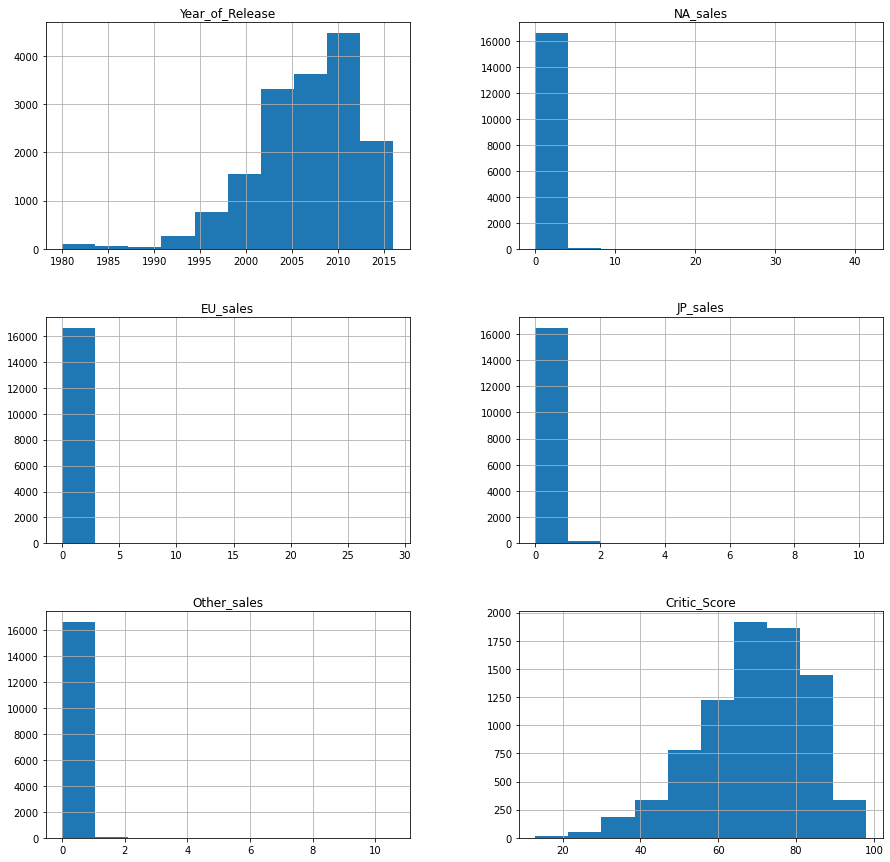

In [6]:
data.hist(figsize=(15, 15))

Нам предоставлены данные по продажам компьютерных игр с 1980-го по 2016 годы включительно. В таблице содержится 16715 игр с данными о них.


Уже на данном этапе заметно достаточно большое количество пропусков в некоторых столбцах (например в столбце `Critic_Score` практически половину от списка составляют пропуски), а также неправильные типы данных. Изучим и устраним эти проблемы при предобработке данных.

## Предобработка данных

Начнём с того, что заменим названия столбцов в датафрейме `data` на написанные snake_case-ом. Полученную в результате предобработки таблицу будем хранить в `data_fix`.

In [7]:
data_fix = data.copy()

In [8]:
data_fix.columns = data_fix.columns.str.lower()

In [9]:
data_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Работа с пропусками

Теперь изучим пропуски по столбцам.

Пойдём по порядку и начнём со столбца `name`. В данном столбце содержатся 2 пропуска.

In [10]:
data_fix.loc[data_fix['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Эти столбцы почти полностью пустые за исключением значений продаж, года выпуска и платформы. Мы можем отбросить эти данные, так как большой значимости для общей картины они не имеют.

In [11]:
data_fix.dropna(subset=['name'], inplace=True)

In [12]:
data_fix.loc[data_fix['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Таким образом мы избавились от пропусков в столбце `name`.

Рассмотрим столбец `year_of_release`.

In [13]:
display(data_fix.loc[data_fix['year_of_release'].isna() == True].shape[0])
display(data_fix.loc[data_fix['year_of_release'].isna() == True].head(20))

269

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


269 строк - не большая потеря данных (потеряем около 1,6% от изначальных данных), можем отбросить эти строки, особенно с учётом того, что в других столбцах у некоторых из них также встреяаются пропуски, а год выпуска логичным образом, кроме как ручным перебором восстановить в большинстве случаев не представляется возможным.

In [14]:
data_fix.dropna(subset=['year_of_release'], inplace=True)

Рассмотрим теперь столбец `genre`.

In [15]:
data_fix.loc[data_fix['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Все пропуски в этом столбце были удалены, когда мы избавились от пропусков в столбце `name`.

Рассмотрим теперь пропуски в столбце `critic_score`.

In [16]:
data_fix.loc[data_fix['critic_score'].isna()].head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


Похоже, что у строк, в которых есть пропуски в столбце `critic_score` есть схожесть в виде пропусков в 3 столбцах `critic_score`, `user_score`, `rating`. Рассмотрим сколько таких от общего числа оставшихся пропусков. Также рассмотрим распределение игр с пропусками в этом столбце по годам, так как в этой выборке достаточно большое число игр, выпущенных до 2000-го года.

In [17]:
data_fix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Пропуски остались только в последних 3 столбцах `critic_score`, `user_score`, `rating`:
 - `critic_score` - 8461 пропуск;
 - `user_score` - 6605 пропусков;
 - `rating` - 6676 пропусков.
Теперь рассмотрим сколько строк с пропусками во всех 3 столбцах одновременно.

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⚠️ А в процентах от имеющихся данных более 40%, что предполагает быть крайне аккуратным в этом вопросе
</div>

In [18]:
data_fix_scores_rating = data_fix.loc[data_fix['critic_score'].isna()]
data_fix_scores_rating = data_fix_scores_rating.loc[data_fix_scores_rating['user_score'].isna()]
data_fix_scores_rating = data_fix_scores_rating.loc[data_fix_scores_rating['rating'].isna()]
data_fix_scores_rating.shape[0]

6534

Количество таких пропусков практически равно количеству пропусков в столбце `user_score`. Посмотрим на распределение этих пропусков по годам, а также сравним это со всей выборкой (датафрейм `data_fix`).

<AxesSubplot:title={'center':'Гистограмма распределения различных игр по годам (красный) и игр\n с пропусками во всех 3 столбцах `rating`, `user_score`, `critic_score` (синий)'}, ylabel='Frequency'>

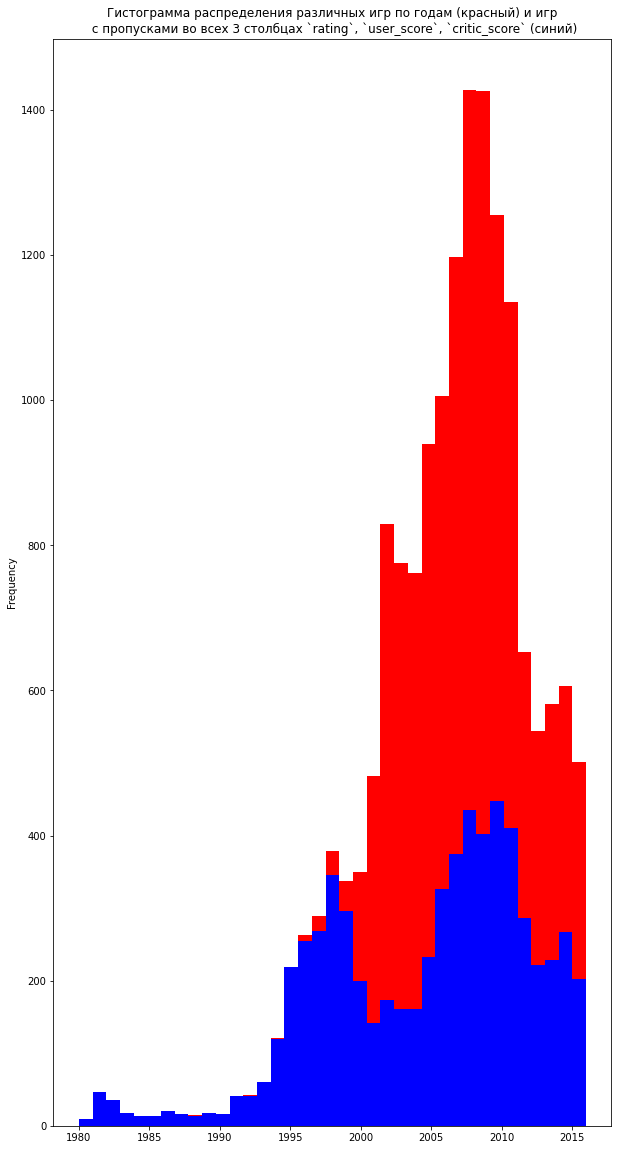

In [19]:
data_fix['year_of_release'].plot(kind='hist', bins=len(data_fix['year_of_release'].unique()), figsize=(10,20), color='red')
data_fix_scores_rating['year_of_release'].plot(kind='hist', bins=len(data_fix_scores_rating['year_of_release'].unique()), figsize=(10,20), color='blue', title='Гистограмма распределения различных игр по годам (красный) и игр\n с пропусками во всех 3 столбцах `rating`, `user_score`, `critic_score` (синий)')

Судя по всему строки с пропусками во всех 3-х столбцах распределены по всей временной шкале.

При этом судя по гистограмме по 1995-й год включительно пропуски есть во всех трёх столбцах для всех игр, которые выходили в это время. Возможно, что эти пропуски возникают просто за счёт того, что данные отсутствуют в интернете, так как он ещё не получил широкого распространения.
Такие пропуски в более поздние годы (примерно с 2000) скорее всего являются либо системной ошибкой, либо же могут возникнуть из-за недостатка данных, если оценка критиков берётся по оценке *хотя бы* нескольких критиков (в пример можно привести популярный агрегатор Metacritic, который ставит оценку критиков на основании хотя бы 4 оценок от критиков).

Оценки критиков в дальнейшем будут использоваться нами в исследованиях. Подобрать логичную замену не отталкиваясь от имеющихся данных и не выстраивая каких-то изначальных зависимостей мы не можем, так как такая замена может создать ложную картину и искаженее данных в дальнейшем. Отбросить мы их тоже не можем, так как отбросив их мы потеряем ~50,6% данных - **более половины**, а это значит, что мы можем потерять столько же данных в других столбцах. Придётся оставить эти пропуски и считать выборку неполной, хотя при этом с учётом того, что в ней присутствует 8254 значения без учёта этиъ пропусков.

Обратимся теперь к колонке `user_score`. Столбец имеет тип `object`, а значит там содержатся не только числовых типов и `NaN`, а также других. Проверим это.

In [20]:
data_fix['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце присутствуют значения 'tbd', что расшифровывается как 'to be determined' - 'подлежащий определению'. Соответственно для таких игр пользовательский рейтинг ещё не определён (по аналогии с оценками критиков на Metacritic оценок может быть недостаточно для определения пользовательского рейтинга). Посмотрим иного ли таких и как они распределены по годам.

Число `tbd` в столбце `user_score`: 2376


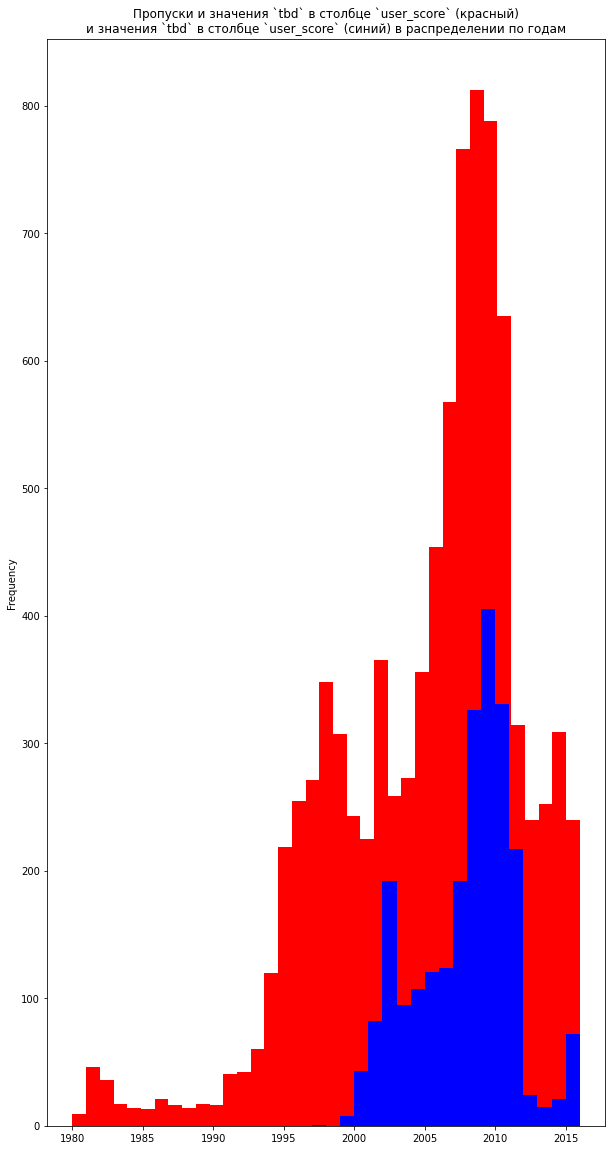

In [21]:
data_fix.loc[(data_fix['user_score'] == 'tbd') | (data_fix['user_score'].isna()), 'year_of_release'].plot(kind='hist', bins=len(data_fix.loc[(data_fix['user_score'] == 'tbd') | (data_fix['user_score'].isna()), 'year_of_release'].unique()), figsize=(10,20), color='red')
data_fix.loc[(data_fix['user_score'] == 'tbd'), 'year_of_release'].plot(kind='hist', bins=len(data_fix.loc[data_fix['user_score'] == 'tbd', 'year_of_release'].unique()), figsize=(10,20), color='blue', title='Пропуски и значения `tbd` в столбце `user_score` (красный)\nи значения `tbd` в столбце `user_score` (синий) в распределении по годам')
print('Число `tbd` в столбце `user_score`:', data_fix.loc[data_fix['user_score'] == 'tbd', 'year_of_release'].shape[0])

Пропуски в оценках пользователей (показаны красным) распространены схожим образом с пропусками в оценках критиков, что может всё же говорить о какой-то системной ощибке при выгрузке значений, которые приходятся на игры после 1995-го года.

Оценки 'tbd' начинают появляться в таблице с 1997-го года, что также можно связать с распространением интернета, а соответственно и появлением агрегаторов.

Значения вида 'tbd' обработаем, заменив их на `NaN`, тогда тип данных в строке изменится на `float64` и они будут поддаваться численной обработке.

In [22]:
import numpy as np

data_fix.loc[data_fix['user_score'] == 'tbd', 'user_score'] = np.nan

In [23]:
data_fix['user_score'].isna().sum()

8981

In [24]:
data_fix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Данные пропуски аналогичны пропускам в столбце `critic_score`: мы будем их использовать их в дальнейших исследованиях, восстановить их по имеющимся значениям не устанавливая зависимостей, а соответственно не создавая искажения в данных, не получится, а удалить мы их не можем, так как мы можем потерять ~53,7% от изначальных данных. Оставим их, выборка при этом всё ещё остаётся представительной, хотя и неполной.

Рассмотрим теперь пропуски в столбце `rating`

<AxesSubplot:title={'center':'Распределение пропусков в столбце `rating` по годам'}, ylabel='Frequency'>

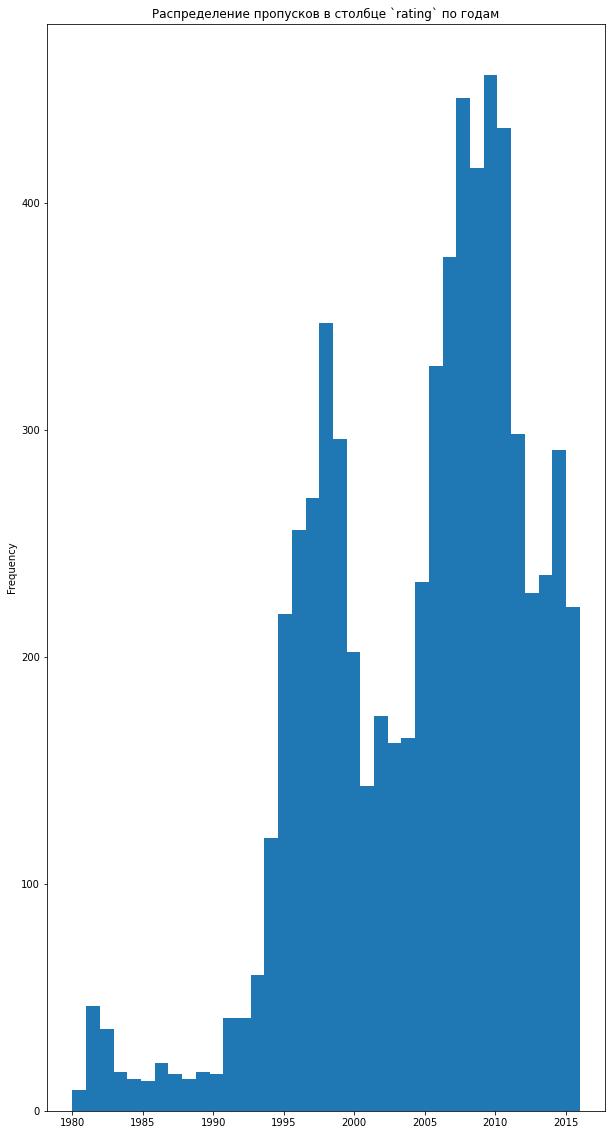

In [25]:
data_fix.loc[data_fix['rating'].isna(), 'year_of_release'].plot(kind='hist', bins=len(data_fix.loc[data_fix['rating'].isna(), 'year_of_release'].unique()), figsize=(10,20), title='Распределение пропусков в столбце `rating` по годам')

Данный столбец формируется из рейтингов организации ESRB, которая выдаёт возрастной рейтинг играм. Сама организация была образована только в 1994 году, поэтому пропуски до 1994 года (или даже включительно 1994 год) не имеют этого рейтинга, потому что ESRB ещё не существовало. Остальные же пропуски скорее всего возникают из-за ошибки выгрузки данных, что также возможно подтверждается самим распределением, которое выглядит схоже с распределениями пропусков в `critic_score` и `user_score`.

Также следует заметить, что по всему миру существуют несколько различных комиссий, которые занимаются выставлением рейтингов (CERO - в Японии, PEGI - в Европе и т.д.), возможно часть таких пропусков связана как раз с тем, что игра не была сертифицирована для США, Канады и Мексики. Рассмотрим медианные и средние продажи по регионам для таких пропусков.

In [26]:
data_fix.loc[data_fix['rating'].isna(), ['na_sales', 'eu_sales', 'jp_sales']].agg(func=['median', 'mean'])

,na_sales,eu_sales,jp_sales
median,0.000000,0.00000,0.020000
mean,0.183619,0.09132,0.125336


Как мы можем заметить по мединным значениям  игры с такими пропусками практически не продаются в регионах NA и EU, но не нулевые продажи в регионе JP, из чего можно предположить, что данные игры возможно выпускаются для локального японского рынка и не имеют высоких продаж на других рынках (Средние же значения показывают, что присутствуют выбросы в виде хорошо продавшихся игр в том числе, особенно в этих данных в столбце na_sales). Возможно они не получали рейтинга в системе ESRB. Если это утверждение верно, то это в дальнейшем может повлиять на составление портрета пользователя по регионам, когда мы будем изучать как продаются игры в зависимости от возрастного рейтинга.

Отбросить эти пропуски мы не можем из-за того, что можем потерять практически 50% данных, но и заполнить их нельзя, потому что игры даже в одном и том же жанре могут иметь различные возрастные рейтинги, которые определяются только от содержания, а потому никак определить их невозможно. Следует оставить эти пропуски.

In [27]:
data_fix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Изменим теперь типы столбцов на правильные:
 - `year_of_release` изменим на `int`.

In [28]:
data_fix['year_of_release'] = data_fix['year_of_release'].astype(int)
data_fix['user_score'] = data_fix['user_score'].astype(float)

Изучим теперь таблицу на наличие явных дубликатов:

In [29]:
data_fix.duplicated().sum()

0

Явные дубликаты отсутствуют, проверим на наличие неявных дубликатов столбец с названиями `name`, посчитав длину списка с уникальными значениями в `data_fix`, а потом приведём все буквы к нижнему регистру и также посчитаем.

In [30]:
print(data_fix['name'].unique().shape[0])
print(data_fix['name'].str.lower().unique().shape[0])

11426
11426


Соответсвенно неявных дубликатов в столбце с названиями игр нет.

In [31]:
data_fix.loc[data_fix['name'].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M
...,...,...,...,...,...,...,...,...,...,...,...
16706,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.00,0.00,NaN,NaN,T
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Добавим столбец с суммарными продажами игр во всех регионах под названием `all_sales`.

In [32]:
data_fix['all_sales'] = data_fix['jp_sales'] + data_fix['na_sales'] + data_fix['eu_sales'] + data_fix['other_sales']

In [33]:
data_fix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  all_sales        16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


array([[<AxesSubplot:title={'center':'year_of_release'}>,
        <AxesSubplot:title={'center':'na_sales'}>,
        <AxesSubplot:title={'center':'eu_sales'}>],
       [<AxesSubplot:title={'center':'jp_sales'}>,
        <AxesSubplot:title={'center':'other_sales'}>,
        <AxesSubplot:title={'center':'critic_score'}>],
       [<AxesSubplot:title={'center':'user_score'}>,
        <AxesSubplot:title={'center':'all_sales'}>, <AxesSubplot:>]],
      dtype=object)

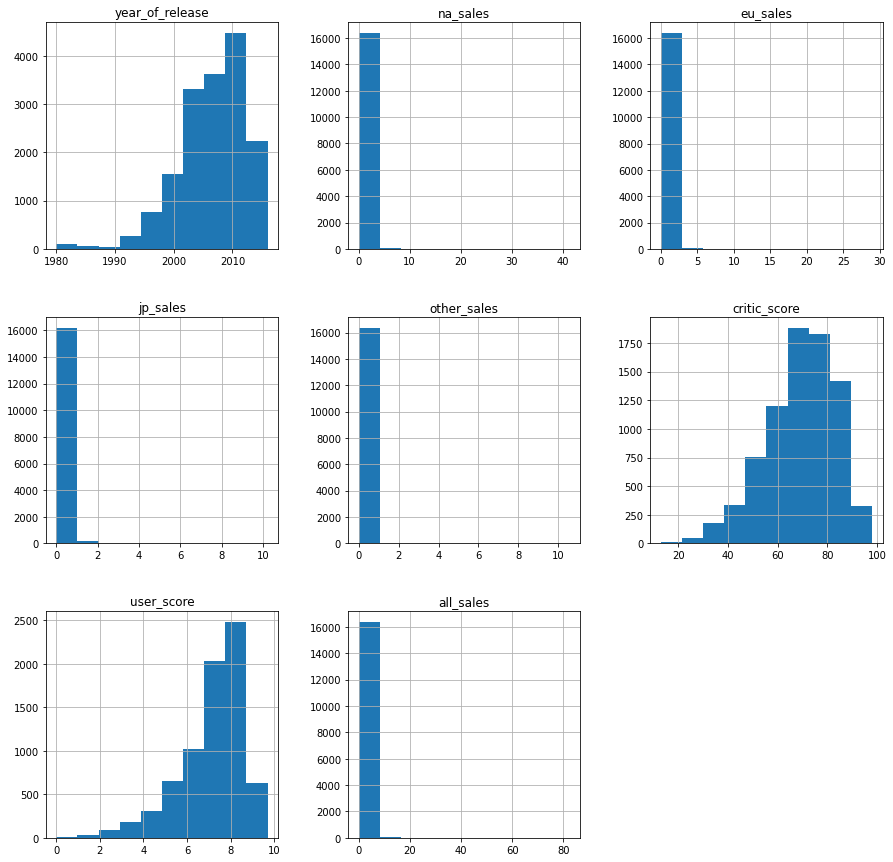

In [34]:
data_fix.hist(figsize=(15, 15))

Таким образом, <b>предобработка данных окончена.</b> Из 16715 значений мы оставили 16444 значения (потеря данных - 271 строка или около 2%), при этом:
 - В столбце `critic_score` есть 8461 пропуск, что составляет около 51% значений выборки и может оказать значительное влияние на дальнейшие результаты;
 - В столбце `user_score` 8981 пропуск, что составляет 55% значений выборки. Это крайне значительная потеря данных, которая может оказать значительное влияние на последующие результаты;
 - В столбце `rating` 6676 пропусков, что составляет 41% значений выборки. Это крайне значительная потеря данных, которая может оказать большое влияние на последующие результаты.

В остальных столбцах пропуски отсутствуют.

Также на данном этапе мы проверили таблицу на наличие явных дубликатов, а также столбец с названиями игр на наличие неявных дубликатов.

В конце мы добавили в датафрейм столбец `all_sales`, в котором содержатся суммарные продажи игр во всех регионах.

Завершим предобработку созданияем датафрейма `data_final` и сбросом индекса.

In [35]:
data_final = data_fix.copy().reset_index(drop=True)

## Исследовательский анализ данных

Рассмотрим распределение игр по годам. Рассмотрим отдельно количество проданных копий по годам и количество различных игр, выпущенных по годам.

<AxesSubplot:title={'center':'Количество проданных копий по годам'}, xlabel='Год выпуска', ylabel='Количество проданных копий, млн шт.'>

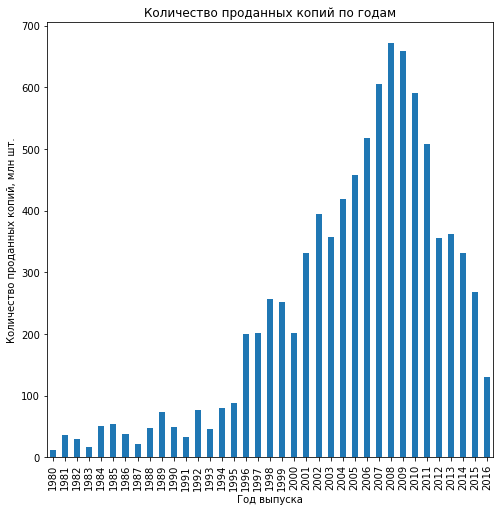

In [36]:
histplot = data_final['all_sales'].groupby(by=data_final['year_of_release']).sum()
histplot.plot(x=histplot.index, y=histplot.values, kind='bar', figsize=(8, 8), xlabel='Год выпуска', ylabel='Количество проданных копий, млн шт.', title='Количество проданных копий по годам')

Из этой гистограммы мы можем понять, что:
 - Лучше всего продавались игры, выпущенные в 2008 году;
 - У игр, выпущенные до 1996 года на данный момент было куплено как минимум в 2 раза меньше чем в любой другой год за исключением 2016 (вероятно из-за недостатка данных).
 
Рассмотрим следующую гистограмму.

<AxesSubplot:ylabel='Frequency'>

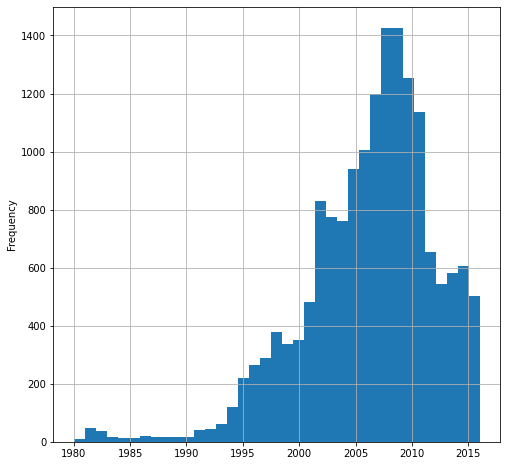

In [37]:
data_final['year_of_release'].plot(x=data_final['year_of_release'], kind='hist', bins=len((data_final['year_of_release'].unique())), figsize=(8, 8), grid=True)

Из этой гистограммы мы можем узнать, что:
 - Больше всего различных игр было выпущено в 2008 году;
 - Количество различных игр, выпущенных до 1995 года меньше, чем в любой другой год как минимум в 2 раза;
 - В 2016 году было выпущено меньше раличных игр, чем в 2015 году, у этого может быть несколько причин:
     - Данные по 2016 году неполные;
     - В 2016 году было действительно мало новых релизов.

Обе этих гистограммы указывают на то, что вероятно для прогноза на 2017 год не следует брать все года из выборки. Сгруппируем игры по платформам и выберем платформы с максимальными суммарными продажами.

In [38]:
data_final['all_sales'].groupby(by=data_final['platform']).sum().sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: all_sales, dtype: float64

Выберем первые 10 платформ, которые представлены в списке и построим для них распределение по годам для количества различных игр, выпущенных для этой платформы

PS2
Год жизни платформы с максимальным числом релизов: 3
Год жизни платформы с максимальным числом проданных копий 5


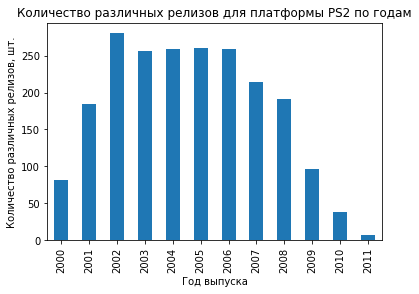

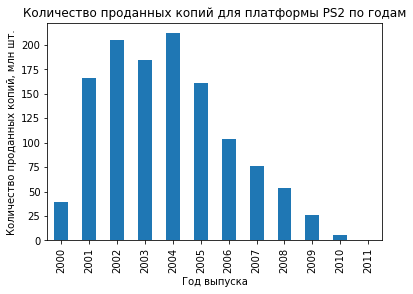

X360
Год жизни платформы с максимальным числом релизов: 7
Год жизни платформы с максимальным числом проданных копий 6


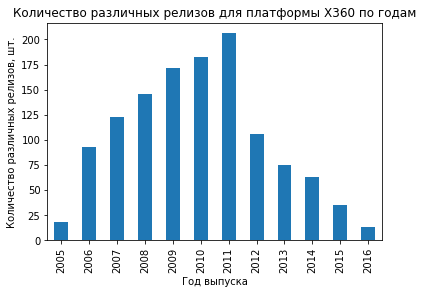

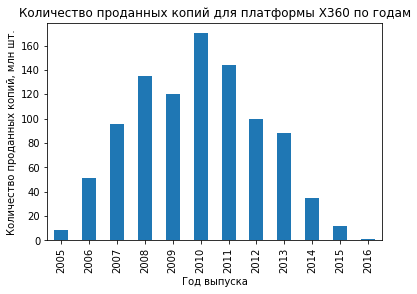

PS3
Год жизни платформы с максимальным числом релизов: 6
Год жизни платформы с максимальным числом проданных копий 6


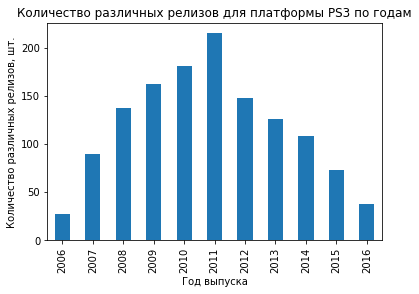

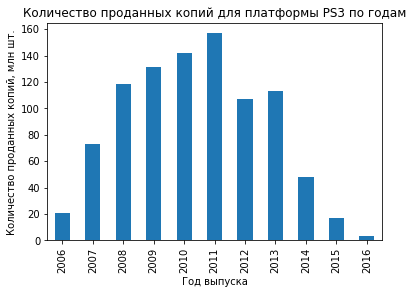

Wii
Год жизни платформы с максимальным числом релизов: 4
Год жизни платформы с максимальным числом проданных копий 4


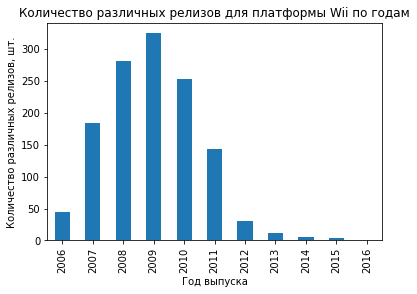

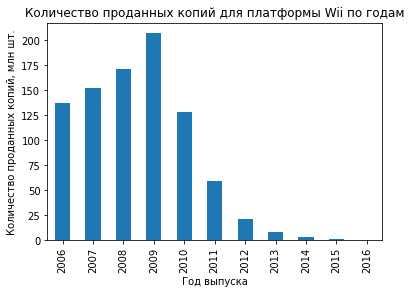

DS
Год жизни платформы с максимальным числом релизов: 6
Год жизни платформы с максимальным числом проданных копий 5


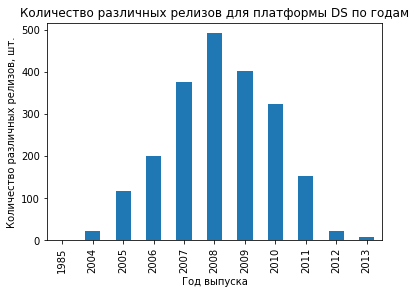

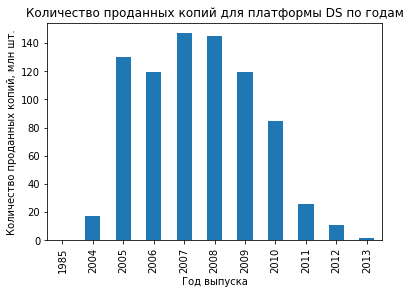

PS
Год жизни платформы с максимальным числом релизов: 5
Год жизни платформы с максимальным числом проданных копий 5


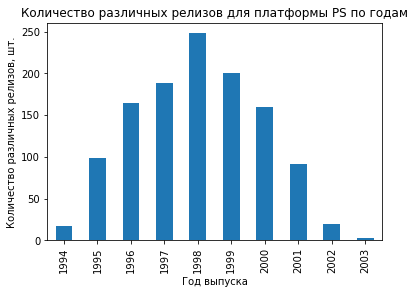

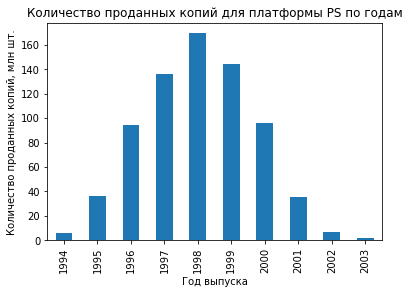

PS4
Год жизни платформы с максимальным числом релизов: 4
Год жизни платформы с максимальным числом проданных копий 3


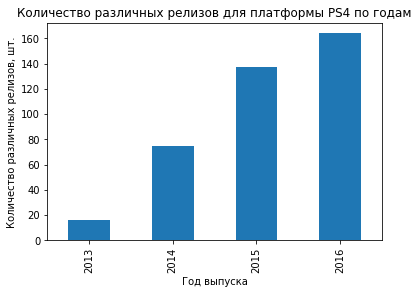

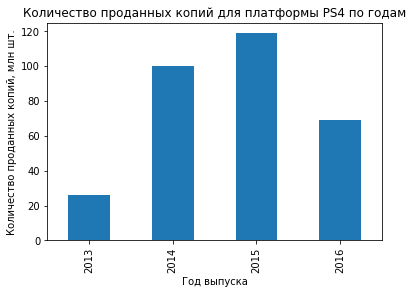

GBA
Год жизни платформы с максимальным числом релизов: 3
Год жизни платформы с максимальным числом проданных копий 5


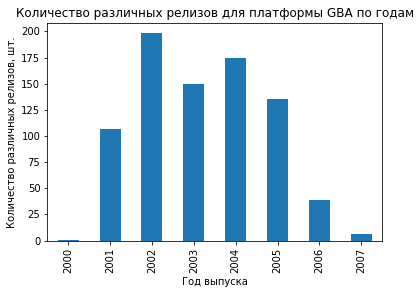

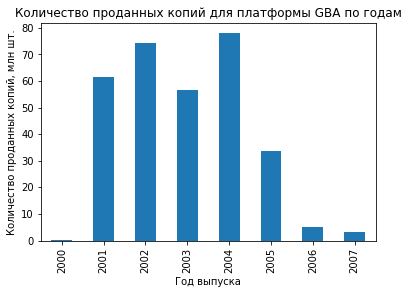

PSP
Год жизни платформы с максимальным числом релизов: 3
Год жизни платформы с максимальным числом проданных копий 3


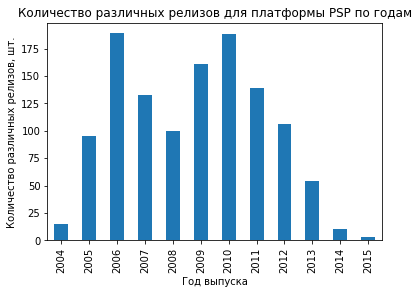

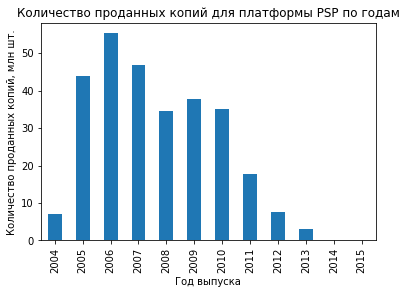

3DS
Год жизни платформы с максимальным числом релизов: 1
Год жизни платформы с максимальным числом проданных копий 1


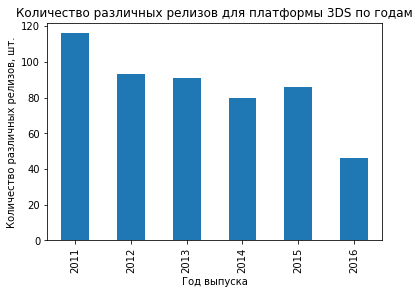

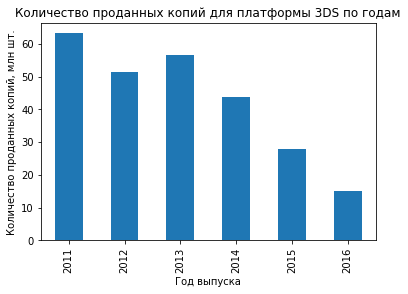

Средняя продолжительность жизни платформы: 9.7 лет
Средний пик по релизам для платформы: 4.2 год
Средний пик по продажам для платформы: 4.3 год


In [39]:
import matplotlib.pyplot as plt
lifespan = []
peak_titles_year = []
peak_sales_year = []
platforms_top_ten = [*data_final['all_sales'].groupby(by=data_final['platform']).sum().sort_values(ascending=False).index[0:10]]
for name in platforms_top_ten:
    print(name)
    histplot_sales = data_final.loc[data_final['platform'] == name, 'all_sales'].groupby(by=data_final['year_of_release']).sum()
    histplot_titles = data_final.loc[data_final['platform'] == name, 'all_sales'].groupby(by=data_final['year_of_release']).count()
    print('Год жизни платформы с максимальным числом релизов:', *histplot_titles.reset_index().loc[histplot_titles.values == max(histplot_titles.values)].index + 1)
    print('Год жизни платформы с максимальным числом проданных копий', *histplot_sales.reset_index().loc[histplot_sales.values == max(histplot_sales.values)].index + 1)
    histplot_titles.plot(x=histplot_titles.index, y=histplot_titles.values, kind='bar', xlabel='Год выпуска', ylabel='Количество различных релизов, шт.', title=f'Количество различных релизов для платформы {name} по годам')
    plt.show()
    histplot_sales.plot(x=histplot_sales.index, y=histplot_sales.values, kind='bar', xlabel='Год выпуска', ylabel='Количество проданных копий, млн шт.', title=f'Количество проданных копий для платформы {name} по годам')
    plt.show()
    lifespan.append(len(histplot_sales.index))
    peak_titles_year.append(*histplot_titles.reset_index().loc[histplot_titles.values == max(histplot_titles.values)].index + 1)
    peak_sales_year.append(*histplot_sales.reset_index().loc[histplot_sales.values == max(histplot_sales.values)].index + 1)
print(f'Средняя продолжительность жизни платформы: {pd.Series(lifespan).mean()} лет')
print(f'Средний пик по релизам для платформы: {pd.Series(peak_titles_year).mean()} год')
print(f'Средний пик по продажам для платформы: {pd.Series(peak_sales_year).mean()} год')

Таким образом в среднем получаем, что на одну платформу выходят новые релизы примерно в течение 10 лет, при этом наибольшее число релизов на платформу выходит в среднем на 4-й год и игры 4-го же года суммарно в среднем продаются лучше всех (возможно, что как раз из-за того, что приходится максимальное число различных игр). Также для некоторых из этих платформ заметен рост числа разлчных релизов, но при этом не рост числа продаж в 2016 году, что может происходить из-за недостатка данных по 2016 году или из-за того, что игры выпущенные в 2016 году пока ещё не продались в достаточном количестве

Для прогноза на 2017 год будем использовать данные за 5-летний промежуток, таким образом мы сможем охватить как уже заканчивающие свой жиненный цикл платформы, так и начинающие его. Выделим игры за этот промежуток в датафрейм `data_five`.

In [40]:
data_five = data_final.loc[data_final['year_of_release'] >= 2012].copy()
data_five = data_five.reset_index(drop=True)
data_five.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2886 entries, 0 to 2885
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   int64  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     1312 non-null   float64
 9   user_score       1531 non-null   float64
 10  rating           1611 non-null   object 
 11  all_sales        2886 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 270.7+ KB


In [41]:
data_five.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,1312.000000,1531.000000,2886.000000
mean,2013.916840,0.204771,0.175613,0.066729,0.054109,72.258384,6.636120,0.501223
std,1.411766,0.566696,0.505346,0.241575,0.164639,12.687087,1.569033,1.249157
min,2012.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2013.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.800000,0.040000
50%,2014.000000,0.030000,0.030000,0.010000,0.010000,74.000000,7.000000,0.120000
75%,2015.000000,0.170000,0.140000,0.050000,0.040000,81.000000,7.800000,0.430000
max,2016.000000,9.660000,9.090000,4.390000,3.960000,97.000000,9.300000,21.050000


In [42]:
data_five['all_sales'].groupby(by=data_five['platform']).sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: all_sales, dtype: float64

Список платформ изменился и уменьшился. Построим для всех платформ графики по аналоги с графиками, которые мы строили для десяти самых популярных платформ.

PS3


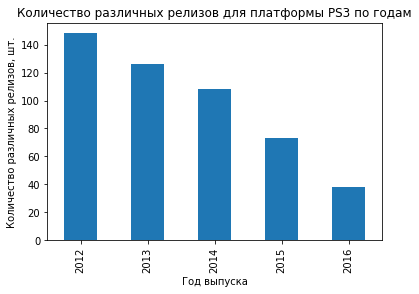

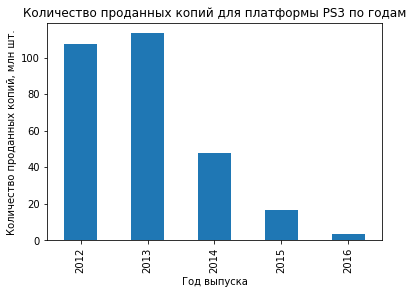

X360


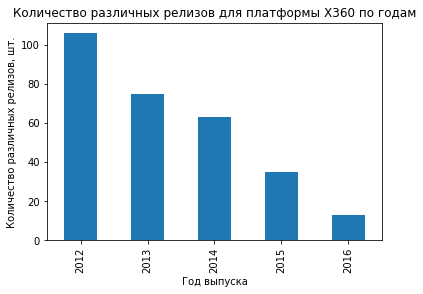

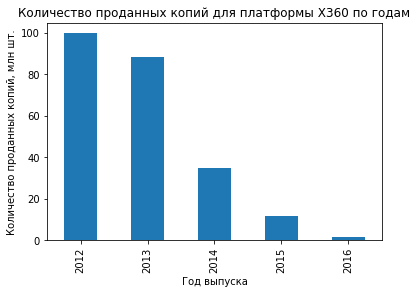

PS4


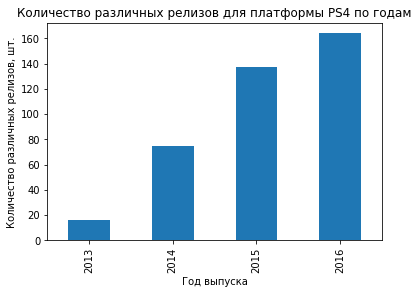

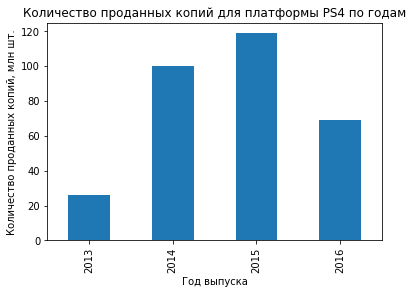

3DS


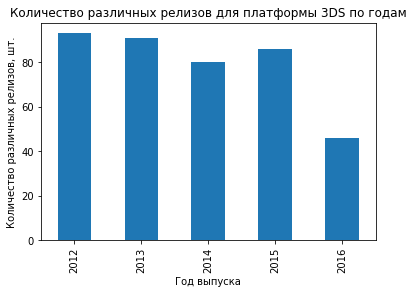

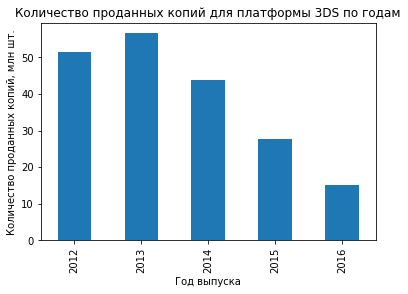

DS


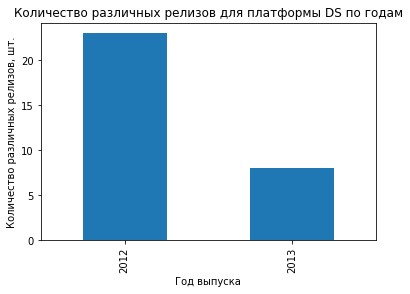

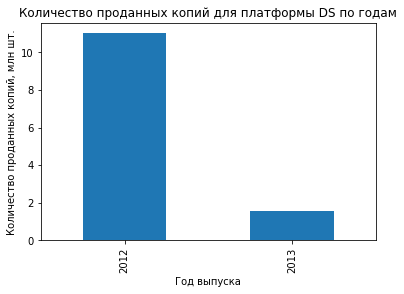

XOne


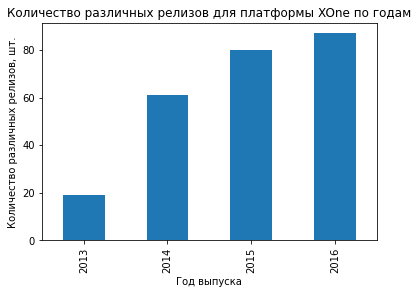

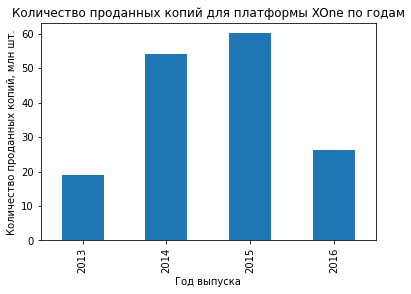

WiiU


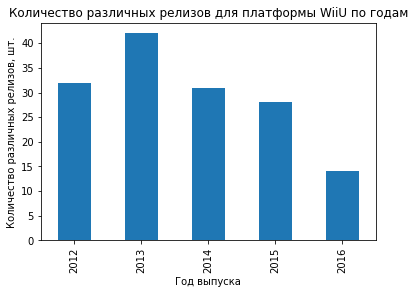

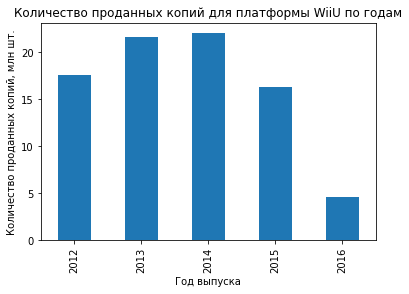

Wii


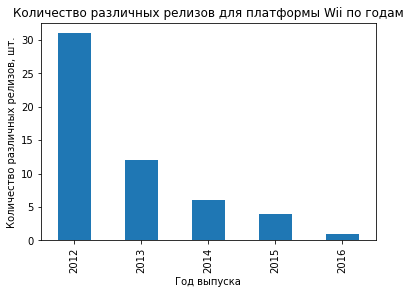

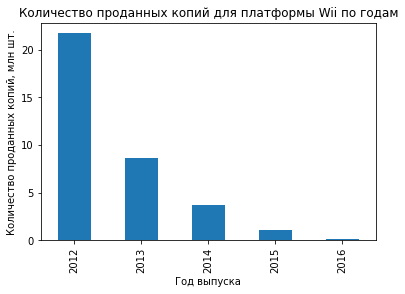

PC


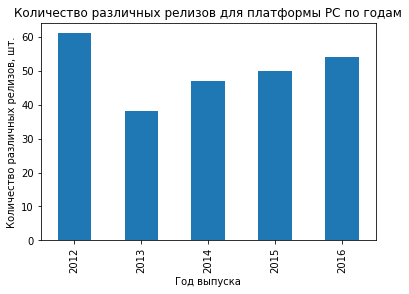

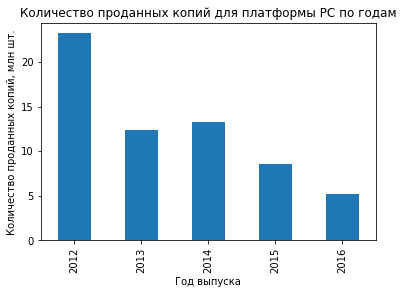

PSV


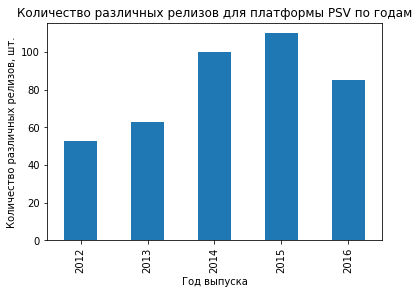

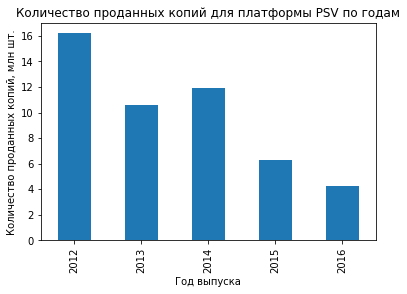

PSP


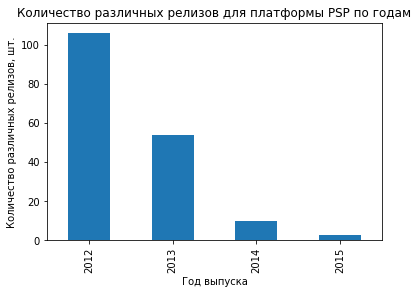

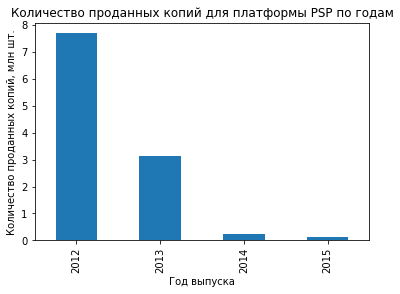

In [43]:
for name in data_five['platform'].unique():
    print(name)
    histplot_sales = data_five.loc[data_five['platform'] == name, 'all_sales'].groupby(by=data_five['year_of_release']).sum()
    histplot_titles = data_five.loc[data_five['platform'] == name, 'all_sales'].groupby(by=data_five['year_of_release']).count()
    histplot_titles.plot(x=histplot_titles.index, y=histplot_titles.values, kind='bar', xlabel='Год выпуска', ylabel='Количество различных релизов, шт.', title=f'Количество различных релизов для платформы {name} по годам')
    plt.show()
    histplot_sales.plot(x=histplot_sales.index, y=histplot_sales.values, kind='bar', xlabel='Год выпуска', ylabel='Количество проданных копий, млн шт.', title=f'Количество проданных копий для платформы {name} по годам')
    plt.show()

PC


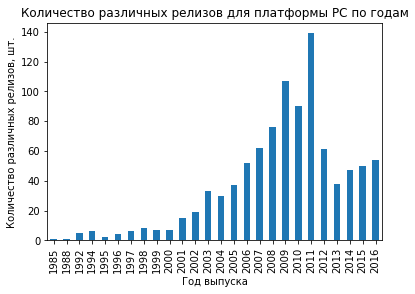

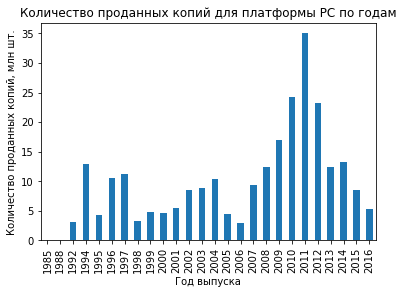

In [44]:
print('PC')
histplot_sales = data_final.loc[data_final['platform'] == 'PC', 'all_sales'].groupby(by=data_final['year_of_release']).sum()
histplot_titles = data_final.loc[data_final['platform'] == 'PC', 'all_sales'].groupby(by=data_final['year_of_release']).count()
histplot_titles.plot(x=histplot_titles.index, y=histplot_titles.values, kind='bar', xlabel='Год выпуска', ylabel='Количество различных релизов, шт.', title=f'Количество различных релизов для платформы PC по годам')
plt.show()
histplot_sales.plot(x=histplot_sales.index, y=histplot_sales.values, kind='bar', xlabel='Год выпуска', ylabel='Количество проданных копий, млн шт.', title=f'Количество проданных копий для платформы PC по годам')
plt.show()

По этим графикам мы можем сказать, что среди платформ, которые растут по продажам мы можем выделить:
 - PS4;
 - XOne;
 
А среди платфом, продажи которых падают:
 - Wii;
 - X360;
 - PS3;
 - WiiU;
 - PSV.
 
На остальные же платформы, представленные в списке выпуск игр уже был прекращён, поэтому можно считать, что они уже прекратили свой жизненный цикл.

Также следует отдельно рассмотреть платформу PC, которую можно отнести к своей отдельной категории, потому что она стабильно существует с 1985-го года и с точки зрения продаж и релизов существует "циклами", но с точки зрения продаж всё же сильно уступает растущим платформам.

Среди потенциально прибыльных платформ можно таким образом выделить PS4, PSV, XOne, PC.

Построим  диаграммы размаха (график "ящик с усами") для глобальных продаж в разбивке по платформам.

<AxesSubplot:title={'center':'all_sales'}, xlabel='platform'>

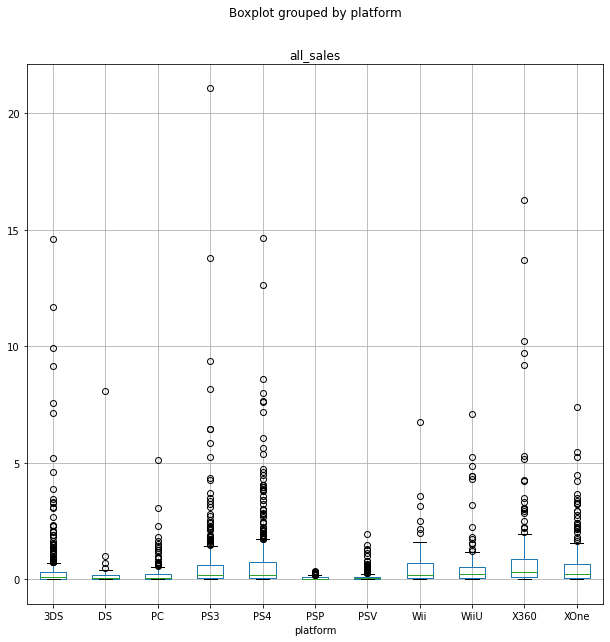

In [45]:
data_five.boxplot(by='platform', column='all_sales', figsize=(10, 10))

Для всех представленных платформ присутствуют в большом количестве выбросы в сторону игр, которые продавались лучше остальных, ни у одной платформы нет выбросов в сторону игр, которые продавались хуже остальных. Наиболее явные и отличающиеся выбросы присутствуют у 3DS, PS3, PS4, X360. Ограничим график продажами до 3 млн копий, таким образом мы сможем получше рассмотреть сами "ящики" и может быть заметим некоторые особенности.

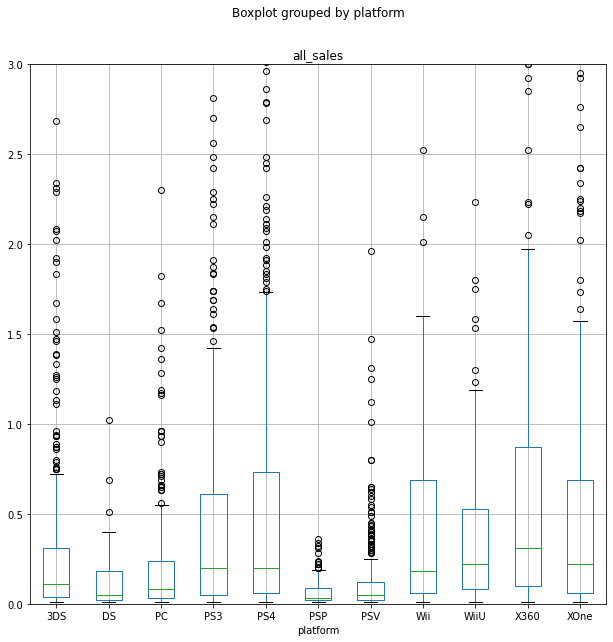

In [46]:
data_five.boxplot(by='platform', column='all_sales', figsize=(10, 10))
plt.ylim(0,3)
plt.show()

Самые низкие медианные продажи у портативных платформ, таких как PSP, PSV, DS, 3DS (хотя она и немного превосходит ПК).

Для медианных значений продаж при переходе от старого к новому поколению платформ можно сказать следующее:
 - Падение: Xbox (Xbox 360 > Xbox One);
 - Рост: DS (3DS > DS), PS портативные (PSV > PSP) (то есть у обеих портативных платформ рост медианного значения продаж);
 - Без изменения: PS стационарные (PS3 ~ PS4), Wii (Wii ~ Wii U).

Соответственно можно сказать, что на всех платформах за исключением Xbox заметно отсутствие снижения медианных продаж игр - игры в среднем на них продаются или лучше или также как на прошлом поколении.

### Влияние оценок пользователей и критиков на общие продажи
Рассмотрим теперь влияние отзывов критиков и игроков на продажи игр внутри одной из популярных платформ. Выберем для этого PS3.

<AxesSubplot:title={'center':'Общие продажи от оценки критиков'}, xlabel='critic_score', ylabel='all_sales'>

Коэффициент корреляции Пирсона для оценок критиков: 0.3314972592629587


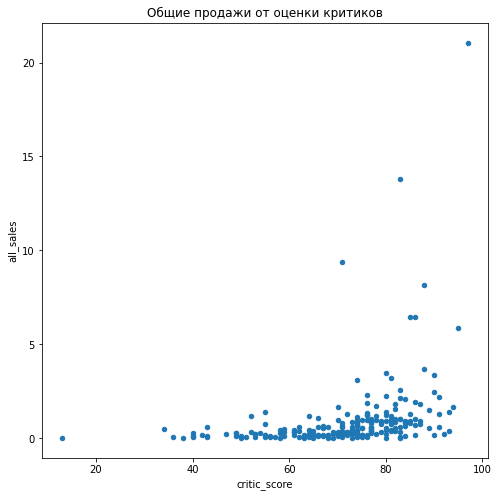

<AxesSubplot:title={'center':'Общие продажи от оценки пользователей'}, xlabel='user_score', ylabel='all_sales'>

Коэффициент корреляции Пирсона для оценок пользователей: -0.005143522887113803


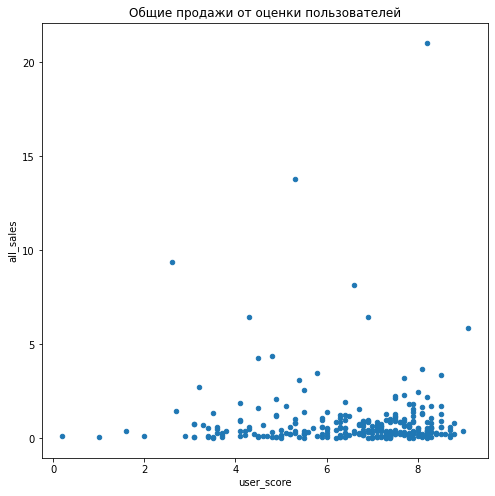

In [47]:
display(data_five.loc[data_five['platform'] == 'PS3'].plot.scatter(x='critic_score', y='all_sales', figsize=(8, 8), title='Общие продажи от оценки критиков'))
print(f'Коэффициент корреляции Пирсона для оценок критиков:', data_five.loc[data_five['platform'] == 'PS3', 'critic_score'].corr(data_five.loc[data_five['platform'] == 'PS3', 'all_sales']))
plt.show()
display(data_five.loc[data_five['platform'] == 'PS3'].plot.scatter(x='user_score', y='all_sales', figsize=(8, 8), title='Общие продажи от оценки пользователей'))
print(f'Коэффициент корреляции Пирсона для оценок пользователей:', data_five.loc[data_five['platform'] == 'PS3', 'user_score'].corr(data_five.loc[data_five['platform'] == 'PS3', 'all_sales']))
plt.show()

Как мы можем заметить по графику и по коэффициенту корреляции Пирсона, равному 0,33, мы можем увидеть, что прямая зависимость, если и есть, то она крайне слабая положительная для оценок критиков.

Для оценок пользователей мы можем заметить по графику ещё меньшую зависимость, а коэффициент корреляции Пирсона, равный -0,005 также подтвержадет это.

Соответственно можно предположить, что продажи игр не зависят от оценок критиков и пользователей. Проверим данную гипотезу для ещё 3 платформ (PS4, X360, 3DS), приведя соответствующие графики и коэффициенты.

PS3


<AxesSubplot:title={'center':'Общие продажи от оценки критиков'}, xlabel='critic_score', ylabel='all_sales'>

Коэффициент корреляции Пирсона для оценок критиков: 0.3314972592629587


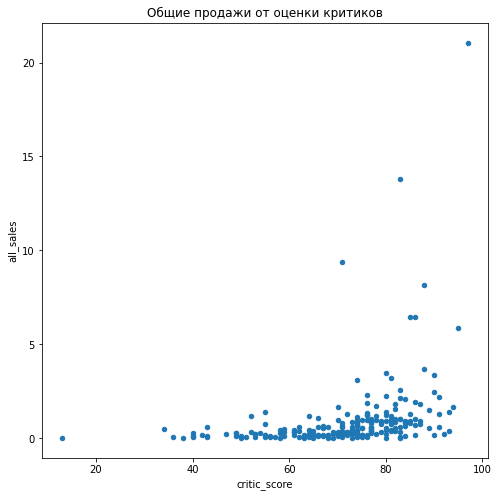

<AxesSubplot:title={'center':'Общие продажи от оценки пользователей'}, xlabel='user_score', ylabel='all_sales'>

Коэффициент корреляции Пирсона для оценок пользователей: -0.005143522887113803


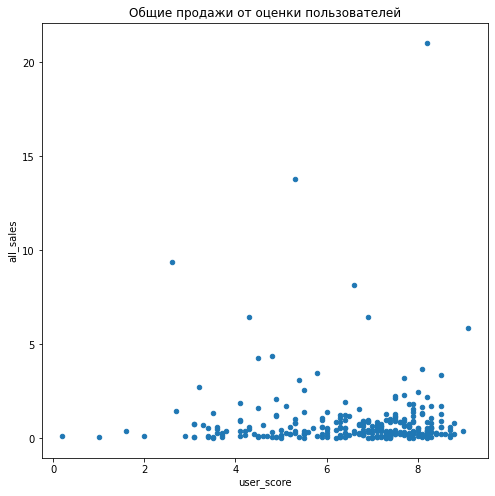

X360


<AxesSubplot:title={'center':'Общие продажи от оценки критиков'}, xlabel='critic_score', ylabel='all_sales'>

Коэффициент корреляции Пирсона для оценок критиков: 0.36057348885073354


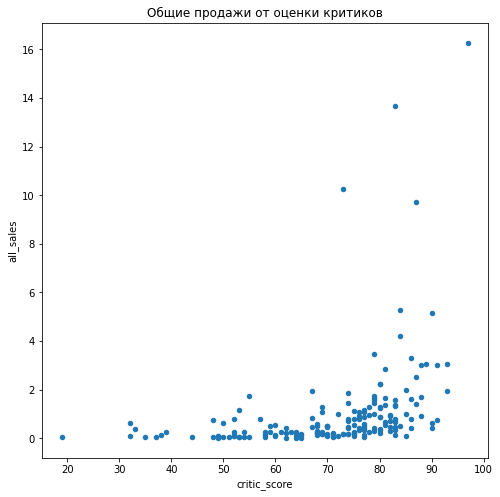

<AxesSubplot:title={'center':'Общие продажи от оценки пользователей'}, xlabel='user_score', ylabel='all_sales'>

Коэффициент корреляции Пирсона для оценок пользователей: 0.006163978646213331


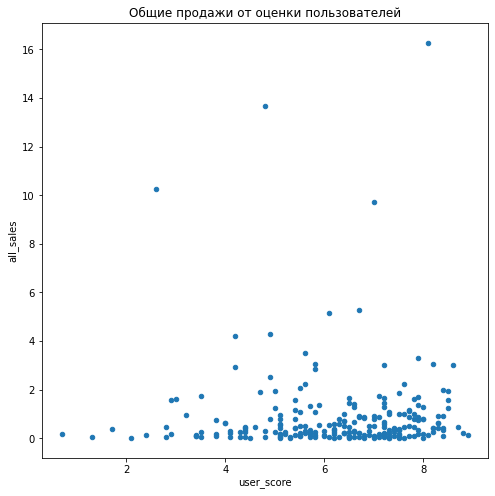

PS4


<AxesSubplot:title={'center':'Общие продажи от оценки критиков'}, xlabel='critic_score', ylabel='all_sales'>

Коэффициент корреляции Пирсона для оценок критиков: 0.40656790206178095


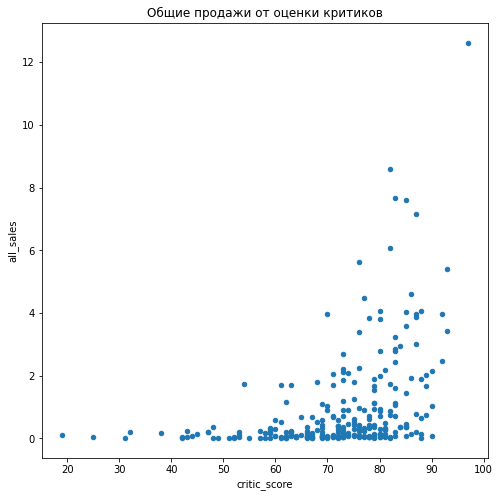

<AxesSubplot:title={'center':'Общие продажи от оценки пользователей'}, xlabel='user_score', ylabel='all_sales'>

Коэффициент корреляции Пирсона для оценок пользователей: -0.03195711020455639


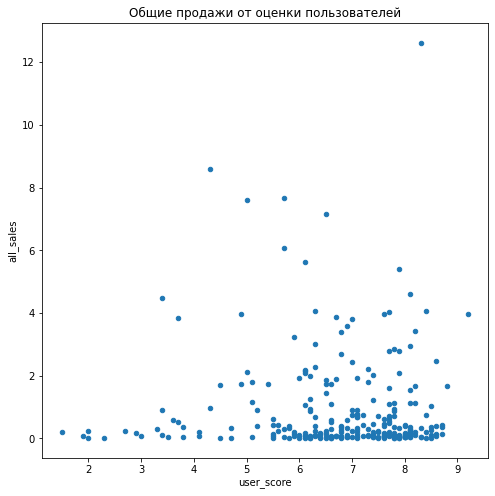

3DS


<AxesSubplot:title={'center':'Общие продажи от оценки критиков'}, xlabel='critic_score', ylabel='all_sales'>

Коэффициент корреляции Пирсона для оценок критиков: 0.32080286953607856


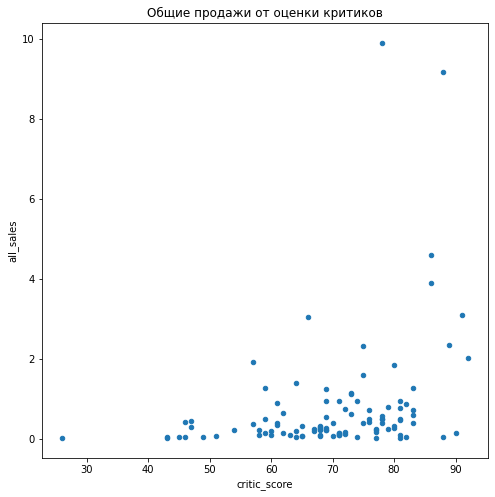

<AxesSubplot:title={'center':'Общие продажи от оценки пользователей'}, xlabel='user_score', ylabel='all_sales'>

Коэффициент корреляции Пирсона для оценок пользователей: 0.19758263411038599


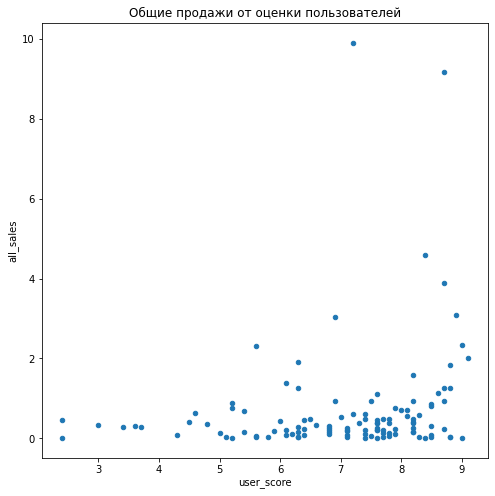

DS


<AxesSubplot:title={'center':'Общие продажи от оценки критиков'}, xlabel='critic_score', ylabel='all_sales'>

Коэффициент корреляции Пирсона для оценок критиков: nan


/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


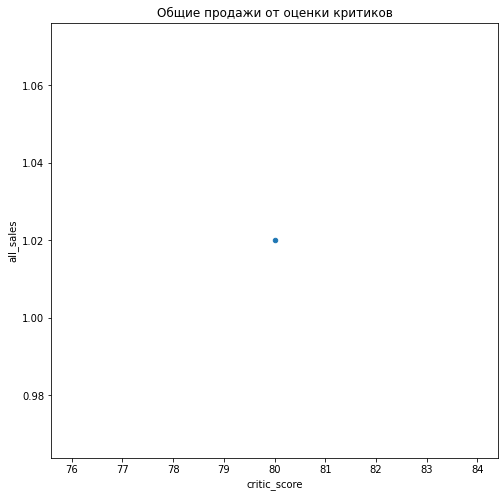

<AxesSubplot:title={'center':'Общие продажи от оценки пользователей'}, xlabel='user_score', ylabel='all_sales'>

Коэффициент корреляции Пирсона для оценок пользователей: 0.88270872757644


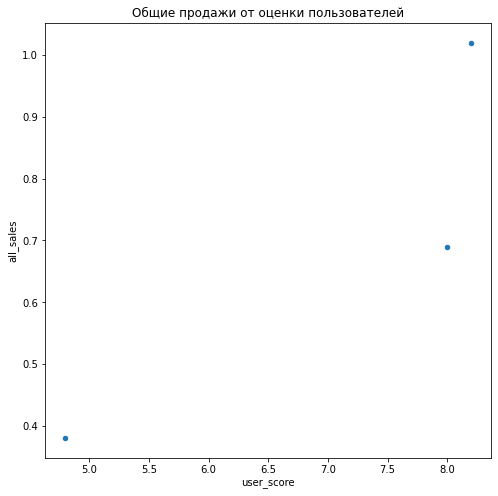

XOne


<AxesSubplot:title={'center':'Общие продажи от оценки критиков'}, xlabel='critic_score', ylabel='all_sales'>

Коэффициент корреляции Пирсона для оценок критиков: 0.41699832800840186


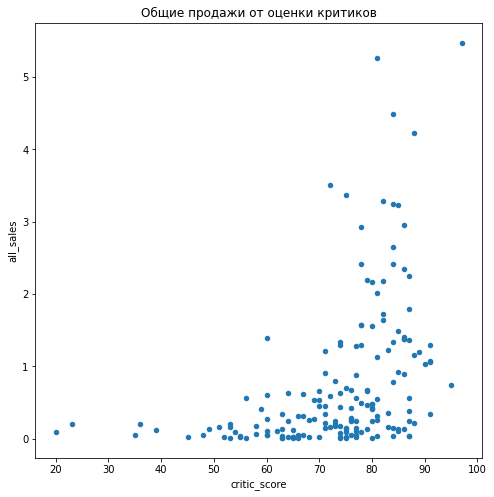

<AxesSubplot:title={'center':'Общие продажи от оценки пользователей'}, xlabel='user_score', ylabel='all_sales'>

Коэффициент корреляции Пирсона для оценок пользователей: -0.06892505328279414


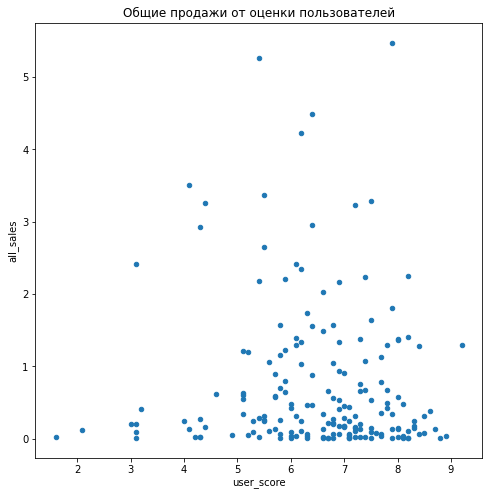

WiiU


<AxesSubplot:title={'center':'Общие продажи от оценки критиков'}, xlabel='critic_score', ylabel='all_sales'>

Коэффициент корреляции Пирсона для оценок критиков: 0.34837976012017496


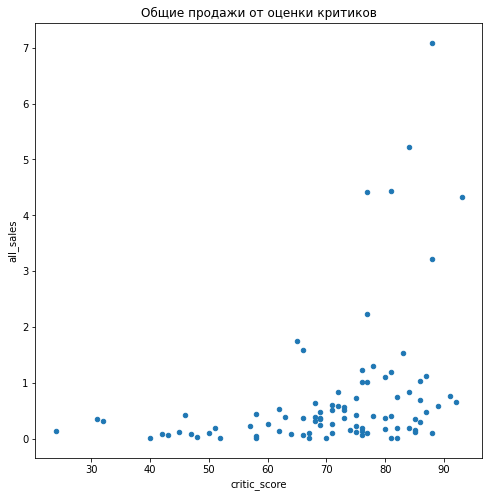

<AxesSubplot:title={'center':'Общие продажи от оценки пользователей'}, xlabel='user_score', ylabel='all_sales'>

Коэффициент корреляции Пирсона для оценок пользователей: 0.4002190202148617


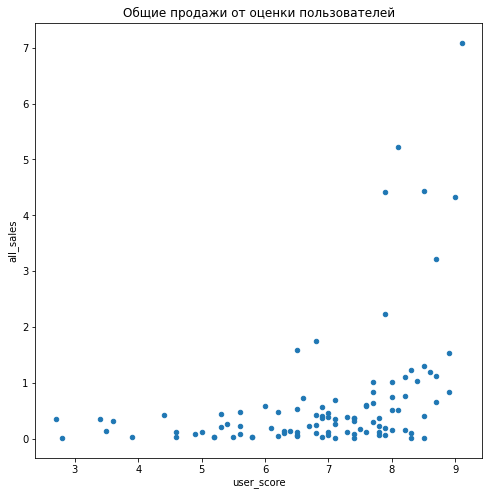

Wii


<AxesSubplot:title={'center':'Общие продажи от оценки критиков'}, xlabel='critic_score', ylabel='all_sales'>

Коэффициент корреляции Пирсона для оценок критиков: -0.4243413011077494


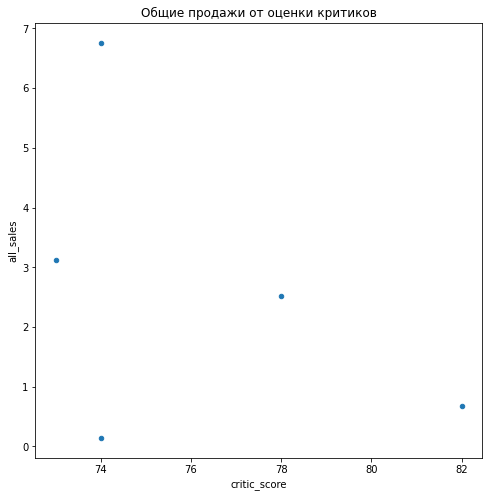

<AxesSubplot:title={'center':'Общие продажи от оценки пользователей'}, xlabel='user_score', ylabel='all_sales'>

Коэффициент корреляции Пирсона для оценок пользователей: 0.29619680007479526


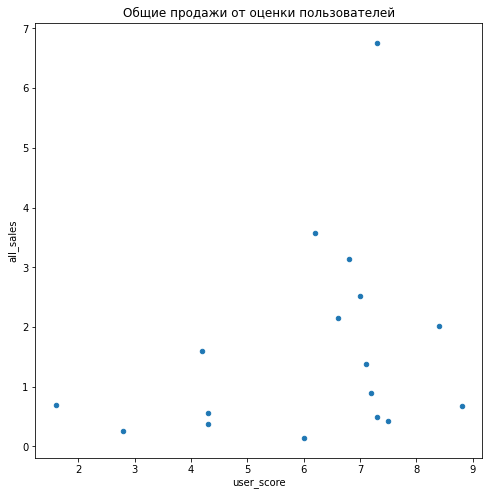

PC


<AxesSubplot:title={'center':'Общие продажи от оценки критиков'}, xlabel='critic_score', ylabel='all_sales'>

Коэффициент корреляции Пирсона для оценок критиков: 0.23724324311567915


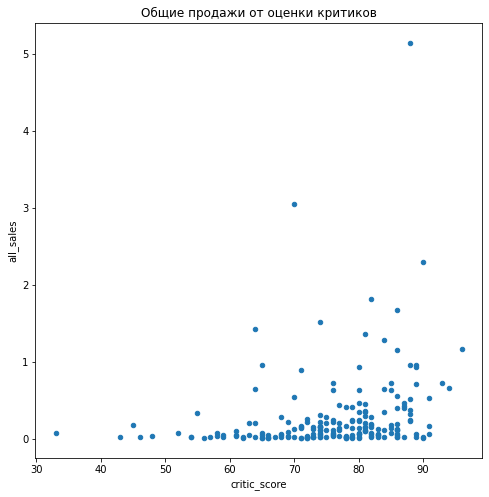

<AxesSubplot:title={'center':'Общие продажи от оценки пользователей'}, xlabel='user_score', ylabel='all_sales'>

Коэффициент корреляции Пирсона для оценок пользователей: -0.12186747630735577


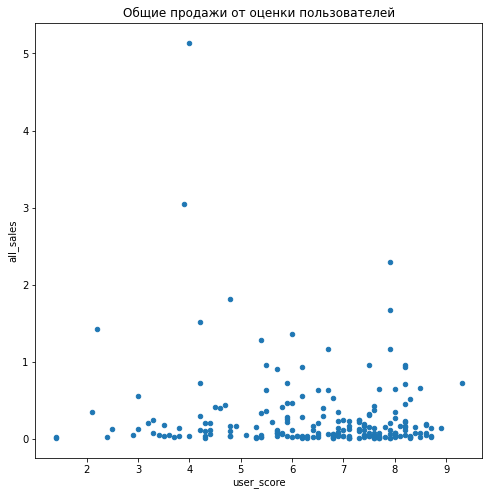

PSV


<AxesSubplot:title={'center':'Общие продажи от оценки критиков'}, xlabel='critic_score', ylabel='all_sales'>

Коэффициент корреляции Пирсона для оценок критиков: 0.0944878992931617


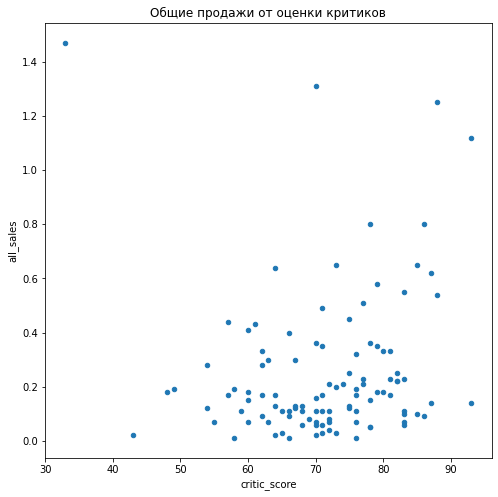

<AxesSubplot:title={'center':'Общие продажи от оценки пользователей'}, xlabel='user_score', ylabel='all_sales'>

Коэффициент корреляции Пирсона для оценок пользователей: -0.004339437514314876


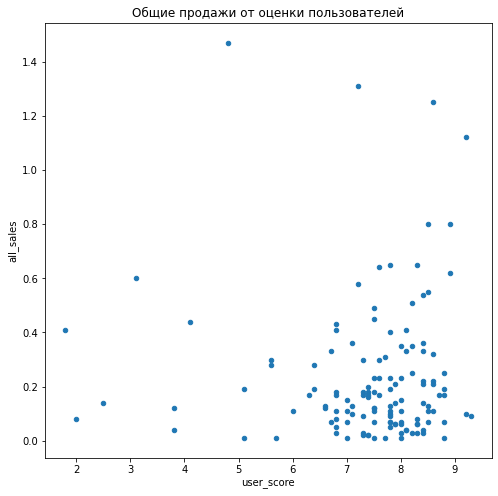

PSP


<AxesSubplot:title={'center':'Общие продажи от оценки критиков'}, xlabel='critic_score', ylabel='all_sales'>

Коэффициент корреляции Пирсона для оценок критиков: nan


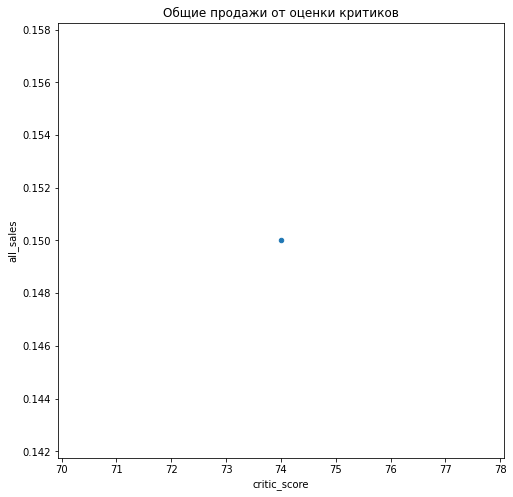

<AxesSubplot:title={'center':'Общие продажи от оценки пользователей'}, xlabel='user_score', ylabel='all_sales'>

Коэффициент корреляции Пирсона для оценок пользователей: -0.802302061939321


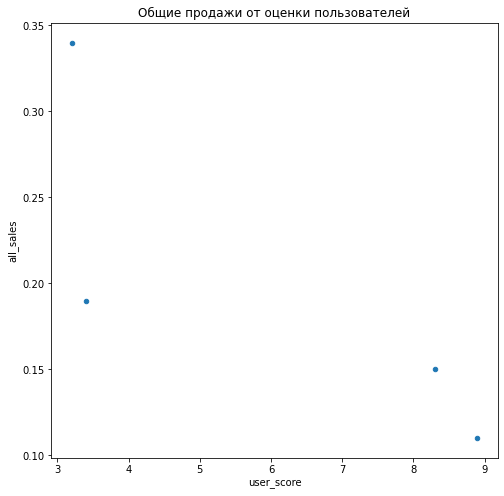

Средний коэффициент корреляции Пирсона для оценок критиков: 0.3314972592629587
Средний коэффициент корреляции Пирсона для оценок пользователей: -0.004339437514314876


In [48]:
mean_critic = []
mean_user = []
for _ in data_five['platform'].unique():
    print(_)
    display(data_five.loc[data_five['platform'] == _].plot.scatter(x='critic_score', y='all_sales', figsize=(8, 8), title='Общие продажи от оценки критиков'))
    print(f'Коэффициент корреляции Пирсона для оценок критиков:', data_five.loc[data_five['platform'] == _, 'critic_score'].corr(data_five.loc[data_five['platform'] == _, 'all_sales']))
    mean_critic.append(data_five.loc[data_five['platform'] == _, 'critic_score'].corr(data_five.loc[data_five['platform'] == _, 'all_sales']))
    plt.show()
    display(data_five.loc[data_five['platform'] == _].plot.scatter(x='user_score', y='all_sales', figsize=(8, 8), title='Общие продажи от оценки пользователей'))
    print(f'Коэффициент корреляции Пирсона для оценок пользователей:', data_five.loc[data_five['platform'] == _, 'user_score'].corr(data_five.loc[data_five['platform'] == _, 'all_sales']))
    mean_user.append(data_five.loc[data_five['platform'] == _, 'user_score'].corr(data_five.loc[data_five['platform'] == _, 'all_sales']))
    plt.show()
print('Средний коэффициент корреляции Пирсона для оценок критиков:', pd.Series(mean_critic).median())
print('Средний коэффициент корреляции Пирсона для оценок пользователей:', pd.Series(mean_user).median())

В целом мы получаем схожие распределения и коэффициенты корреляции Пирсона для всех платформ. Для общей оценки мы находим медианные значения таких коэффициентов, так как по графикам видно, что у нас есть выбросы (в виде всего 3 или 1 оценки как у PSP), которые могут являются результатом пропусков в столбцах `user_score` и `critic_score`. В результате получаем медианные значения:
 - Коэффициент корреляции Пирсона для оценок критиков: 0,33;
 - Коэффициент корреляции Пирсона для оценок пользователей: -0,004;

Таким образом можем считать, что для всех платформ, представленных в датасете будет верно следующее: у продаж игр не прослеживается зависимость от (связь с) оценок пользователей и критиков, либо же существует крайне слабая связь с оценками критиков.

### Общее распределение игр по жанрам

Изучим общее распределение игр по жанрам для всех платформ, представленных в таблице `data_five`, а также их суммарные продажи относительно общих суммарных продаж и выделим доли. Воспользуемся для этого круговой диаграммой.

<AxesSubplot:title={'center':'Суммарные продажи по жанрам'}, ylabel='all_sales'>

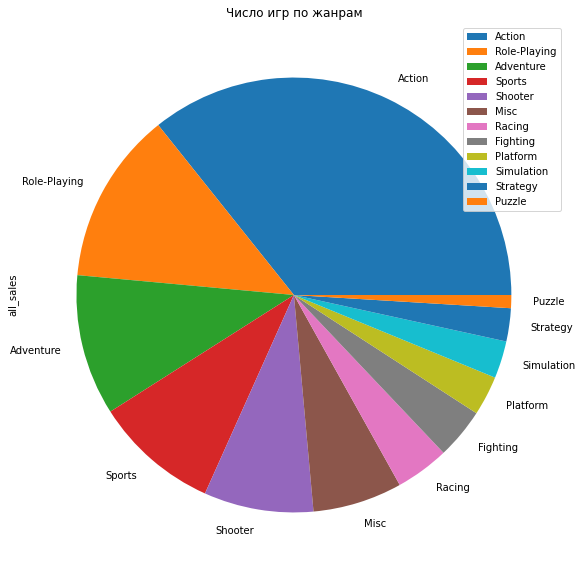

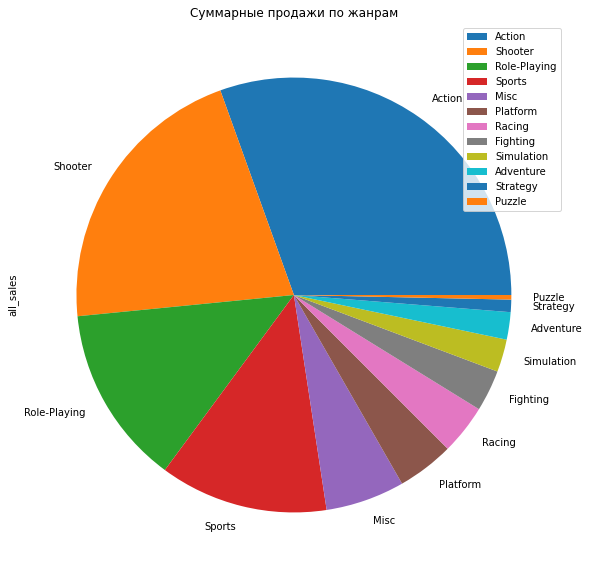

In [49]:
data_five.groupby(by='genre').count().sort_values(by='all_sales', ascending=False).plot.pie(y='all_sales', figsize=(10,10), title='Число игр по жанрам')
data_five.groupby(by='genre').sum().sort_values(by='all_sales', ascending=False).plot.pie(y='all_sales', figsize=(10,10), title='Суммарные продажи по жанрам')

Относительно количества выпускаемых игр можем сказать следующее:
1. Наибольшую долю рынка (более 50%) по количеству различных релизов занимают следующие жанры:
 - Action;
 - Role-Playing;
 - Adventure.
2. Наименьшую долю рынка занимают жанры:
 - Puzzle;
 - Strategy;
 - Simulation.

Относительно количества проданных копий же получаем иную статистику:
1. Наибольшую долю рынка (более 50%) составляют продажи игр следующих жанров:
 - Action;
 - Shooter.
 
Вмесие с жанром Role-Playing эти жанры суммарно составляют около 65% от всех проданных копий.

2. Наименьшую долю рынка составляют продажи игр жанров:
 - Puzzle;
 - Strategy;
 - Adventure.
 
 По двум этим круговым диаграммам можем сделать следующие замечания:
 1. Жанр Shooter, в котором выпускают только около 1/16 (~6,25%) от всех различных релизов составляют практически 1/4 от всех продаж, что говорит о том, что хотя игр в этом жанре выходит меньше, но продаются они сильно лучше, чем игры в других жанрах.
 2. Жанр Adventure же показывает обратную тенденцию: хотя количество игр, выходящих в этом жанре составляет около 1/8 (~12,5%) от всех различных релизов составляет лишь около 2% от всех проданных копий, то есть хотя игр в этом жанре выходит больше, но продаются они в среднем хуже, чем другие.

Рассмотрим также медианные и средние продажи для жанра, так мы сможем понять какие жанры в целом продаются лучше, а какие хуже.

In [50]:
data_five.pivot_table(index='genre', values=['all_sales'], aggfunc=['mean', 'median'])

,mean,median
,all_sales,all_sales
genre,,
Action,0.427856,0.120
Adventure,0.097450,0.030
Fighting,0.408165,0.130
Misc,0.442917,0.120
Platform,0.717647,0.210
Puzzle,0.174643,0.045
Racing,0.465217,0.140
Role-Playing,0.521081,0.140


Из сводной таблицы можем узнать следующее:
Лучшие медианные продажи имеют жанры:
 - Shooter (0,44 млн);
 - Sports (0,24 млн);
 - Platform (0,21 млн).

Худшие медианные продажи:
 - Adventure (0,03 млн);
 - Strategy (0,08 млн);
 - Action, Simulation, Misc (0,12 млн).

Медианные продажи говорят о том, что игры в определённом жанре будут в целом продаваться "лучше" или "хуже" по сравнению с остальными.

Лучшие средние продажи:
 - Shooter (1,30 млн);
 - Platform (0,72 млн);
 - Sports (0,68 млн).
 
Худшие средние продажи:
 - Adventure (0,10 млн);
 - Puzzle (0,17 млн);
 - Strategy (0,19 млн).

Средние продажи говорят о наличии сильных выбросов в меньшую или большую сторону для этого жанра.

Таким образом мы можем заключить, что для жанров Shooter, Sports, Platform верно как то, что игры в этих жанрах в среднем продаются лучше, чем во всех остальных жанрах, так и то, что в них присутствуют игры, которые могут оказаться "хитами". Полностью обратная ситуация присуща жанрам Strategy, Adventure, игры в которых в среднем продаются хуже, чем в остальных, но и "хиты" скорее всего будут "хитами" для жанра, но не для общей картины.

### Выводы из исследовательского анализа

По итогам проведения исследовательского анализа мы пришли к следующим выводам:
1. Для исследования важны данные не за все периоды и для дальнейших исследований мы будем использовать промежуток времени  в 5 лет: таким образом мы сможем отсечь платформы, которые уже завершили свой "жизненный цикл", а также сможем включить скорее всего все платформы, которые ещё смогут расти.
2. По этим графикам мы можем сказать, что среди платформ, которые растут по продажам мы можем выделить:
 - PS4;
 - XOne;
 - PSV;

А среди платфом, продажи которых падают:
 - Wii;
 - X360;
 - PS3;
 - WiiU.
 
 3. Построив график "ящик с усами" мы смогли сказать, что у всех платформ в той или иной степени присутствуют выбросы со стороны игр, которые продались лучше, чем средние игры для этой платформы, наиболее это заметно на платформах:
 - 3DS;
 - PS3;
 - PS4;
 - X360.
 
4. По данной выборке мы можем сказать, что продажи игр скорее всего не связаны с оценками пользователей или критиков. Такая тенденция заметная для 4 самых популярных платформ, представленных в выборке.
5. Продажи игр в различных жанрах связаны с количеством различных игр в этом жанре за исключением 2 жанров:
 - Shooter, которые продаются лучше чем остальные жанры в среднем;
 - Adventure, которые продаются хуже, чем остальные жанры в среднем.
 
 По общей прибыльности (количеству копий) можно выделить 3 следующих жанра:
  - Action;
  - Shooter;
  - Role-Playing.
 
 Также можно выделить 3 самых прибыльных жанра по медианным и среднием значениям:
 - Shooter;
 - Sports;
 - Platform.
 
 Игры в этих жанрах будут продаваться лучше, как в среднем, так и "хитовые" игры приносят больше продаж, чем в других жанрах.

## Портрет пользователя (по регионам)

Хотя до этого мы исследовали зависмость, которые верны для общих продаж, рассмотрим теперь пользователей в 3 крупных регионах:
 - NA - North America, Северная Америка;
 - EU - Europena Union, Евросоюз;
 - JP - Japan, Япония.

### Популярность платформ
Выделим популярные платформы для каждого из 3 регионов.

Северная Америка


platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
WiiU     38.10
PC       19.12
Wii      17.45
PSV      10.98
DS        4.59
PSP       0.13
Name: na_sales, dtype: float64

Доли


platform
X360    0.236983
PS4     0.184003
PS3     0.174933
XOne    0.157571
3DS     0.093592
WiiU    0.064470
PC      0.032354
Wii     0.029528
PSV     0.018580
DS      0.007767
PSP     0.000220
Name: na_sales, dtype: float64

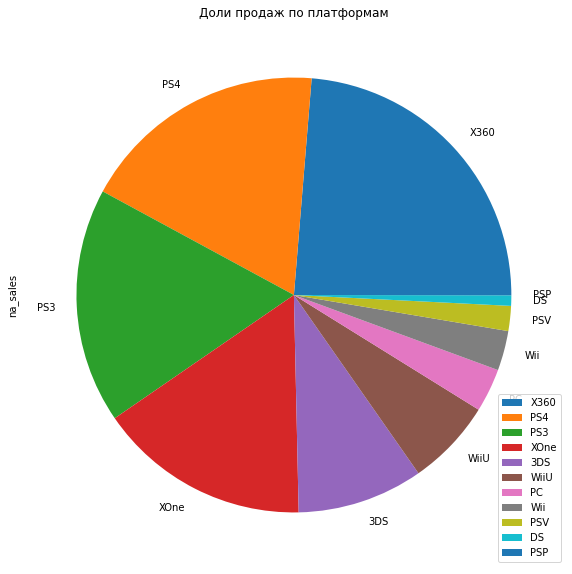

Евросоюз


platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
PC       37.76
WiiU     25.13
Wii      11.92
PSV      11.36
DS        3.53
PSP       0.42
Name: eu_sales, dtype: float64

Доли


platform
PS4     0.278383
PS3     0.210844
X360    0.147034
XOne    0.101792
3DS     0.084132
PC      0.074504
WiiU    0.049584
Wii     0.023519
PSV     0.022414
DS      0.006965
PSP     0.000829
Name: eu_sales, dtype: float64

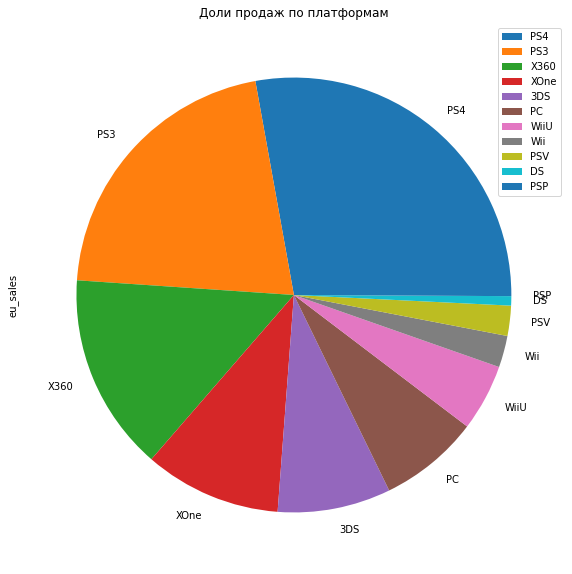

Япония


platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
PSP     10.47
DS       3.72
Wii      3.39
X360     1.57
XOne     0.34
PC       0.00
Name: jp_sales, dtype: float64

Доли


platform
3DS     0.455862
PS3     0.183249
PSV     0.109253
PS4     0.082875
WiiU    0.067556
PSP     0.054367
DS      0.019317
Wii     0.017603
X360    0.008152
XOne    0.001766
PC      0.000000
Name: jp_sales, dtype: float64

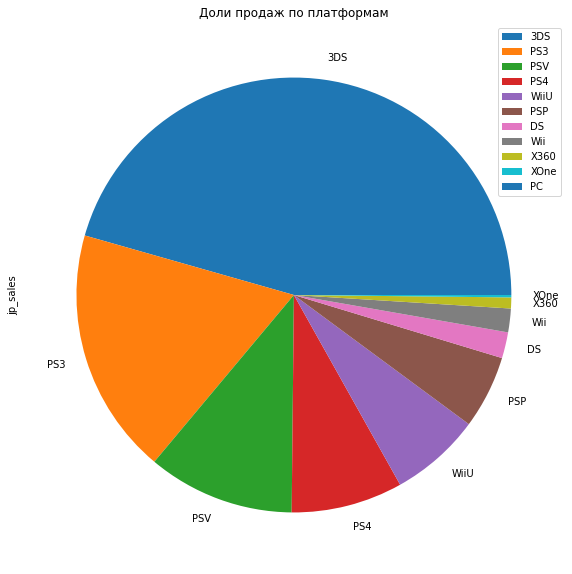

In [51]:
print('Северная Америка')
data_five.groupby(by='platform').sum().sort_values(by='na_sales', ascending=False).plot.pie(y='na_sales', figsize=(10,10), title='Доли продаж по платформам')
display(data_five['na_sales'].groupby(by=data_five['platform']).sum().sort_values(ascending=False))
print('Доли')
display(data_five['na_sales'].groupby(by=data_five['platform']).sum().sort_values(ascending=False) / data_five['na_sales'].sum())
plt.show()
print('Евросоюз')
data_five.groupby(by='platform').sum().sort_values(by='eu_sales', ascending=False).plot.pie(y='eu_sales', figsize=(10,10), title='Доли продаж по платформам')
display(data_five['eu_sales'].groupby(by=data_five['platform']).sum().sort_values(ascending=False))
print('Доли')
display(data_five['eu_sales'].groupby(by=data_five['platform']).sum().sort_values(ascending=False) / data_five['eu_sales'].sum())
plt.show()
print('Япония')
data_five.groupby(by='platform').sum().sort_values(by='jp_sales', ascending=False).plot.pie(y='jp_sales', figsize=(10,10), title='Доли продаж по платформам')
display(data_five['jp_sales'].groupby(by=data_five['platform']).sum().sort_values(ascending=False))
print('Доли')
display(data_five['jp_sales'].groupby(by=data_five['platform']).sum().sort_values(ascending=False) / data_five['jp_sales'].sum())
plt.show()

По регионам мы можем сказать следующее (топ-5 платформ):

1. В Северной Америке популярнее всего следующие платформы:
 - X360    23,6%;
 - PS4     18,4%;
 - PS3     17,5%;
 - XOne    15,8%;
 - 3DS      9,4%.

2. В Евросоюзе популярнее всего следующие платформы:
 - PS4     27,8%;
 - PS3     21,1%;
 - X360    14,7%;
 - XOne    10,2%;
 - 3DS      8,4%.

3. В Японии популярнее всего следующие платформы:
 - 3DS     45,6%;
 - PS3     18,3%;
 - PSV     10,9%;
 - PS4      8,3%;
 - WiiU     6,8%.
 
Выделим особенности для регионов:
1. В Северной Америке (NA) популярнее по сравнению с другими регионами распространены X360, XOne, которые являются консолями Майкрософт - американского производителя.
2. В Евросоюзе (EU) больше распространены платформы PS3 и PS4 производства Sony, суммарно занимающие практически до половину от всех продаж.
3. В Японии все платформы, представленные в топ-5 списке от локальных производителей Nintendo и Sony, также в отличие от 2 других регионов в списке представлены целых 2 портативных платформы PSV (не представлена больше ни в одном другом топе) и 3DS (которая в отличие от 2 других регионов, в которых занимает 5-е места, занимает 1-е место с охватом в 45,6% рынка).

### Популярность жанров

Рассмотрим популярность жанров для каждого из 3 регионов.

Северная Америка


genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Platform         25.38
Fighting         19.79
Racing           17.22
Adventure         8.92
Simulation        7.97
Strategy          4.23
Puzzle            1.13
Name: na_sales, dtype: float64

Доли


genre
Action          0.300929
Shooter         0.244970
Sports          0.137960
Role-Playing    0.108297
Misc            0.064623
Platform        0.042946
Fighting        0.033487
Racing          0.029139
Adventure       0.015094
Simulation      0.013486
Strategy        0.007158
Puzzle          0.001912
Name: na_sales, dtype: float64

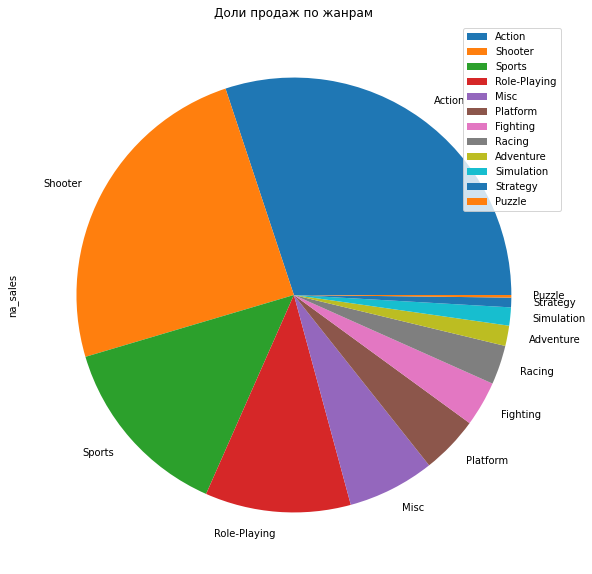

Евросоюз


genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Misc             26.32
Platform         21.41
Simulation       14.55
Fighting         10.79
Adventure         9.46
Strategy          5.17
Puzzle            1.40
Name: eu_sales, dtype: float64

Доли


genre
Action          0.314392
Shooter         0.223886
Sports          0.136321
Role-Playing    0.095754
Racing          0.053846
Misc            0.051932
Platform        0.042244
Simulation      0.028708
Fighting        0.021290
Adventure       0.018665
Strategy        0.010201
Puzzle          0.002762
Name: eu_sales, dtype: float64

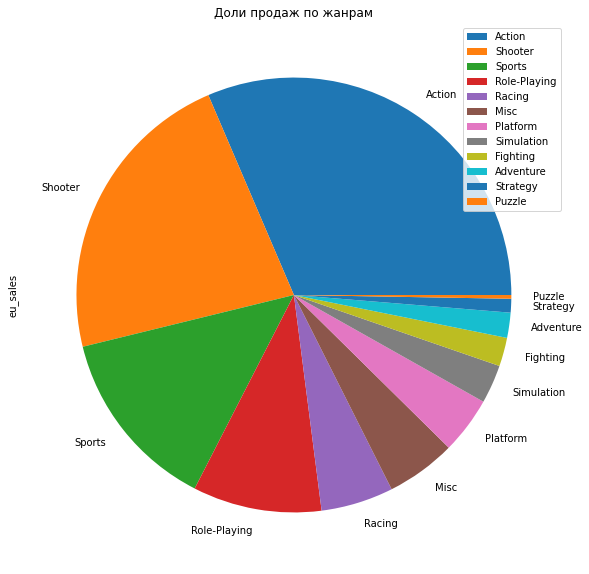

Япония


genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Shooter          9.23
Platform         8.63
Adventure        8.24
Sports           8.01
Strategy         2.88
Racing           2.50
Puzzle           2.14
Name: jp_sales, dtype: float64

Доли


genre
Role-Playing    0.339807
Action          0.274172
Misc            0.066777
Simulation      0.054055
Fighting        0.049019
Shooter         0.047928
Platform        0.044813
Adventure       0.042787
Sports          0.041593
Strategy        0.014955
Racing          0.012982
Puzzle          0.011112
Name: jp_sales, dtype: float64

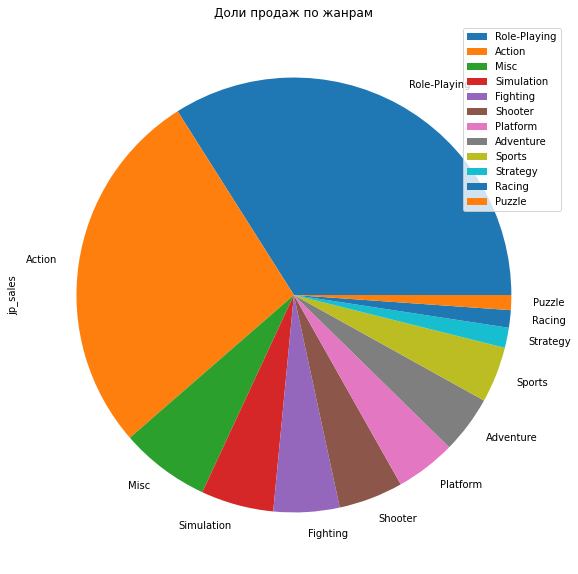

In [52]:
print('Северная Америка')
data_five.groupby(by='genre').sum().sort_values(by='na_sales', ascending=False).plot.pie(y='na_sales', figsize=(10,10), title='Доли продаж по жанрам')
display(data_five['na_sales'].groupby(by=data_five['genre']).sum().sort_values(ascending=False))
print('Доли')
display(data_five['na_sales'].groupby(by=data_five['genre']).sum().sort_values(ascending=False) / data_five['na_sales'].sum())
plt.show()
print('Евросоюз')
data_five.groupby(by='genre').sum().sort_values(by='eu_sales', ascending=False).plot.pie(y='eu_sales', figsize=(10,10), title='Доли продаж по жанрам')
display(data_five['eu_sales'].groupby(by=data_five['genre']).sum().sort_values(ascending=False))
print('Доли')
display(data_five['eu_sales'].groupby(by=data_five['genre']).sum().sort_values(ascending=False) / data_five['eu_sales'].sum())
plt.show()
print('Япония')
data_five.groupby(by='genre').sum().sort_values(by='jp_sales', ascending=False).plot.pie(y='jp_sales', figsize=(10,10), title='Доли продаж по жанрам')
display(data_five['jp_sales'].groupby(by=data_five['genre']).sum().sort_values(ascending=False))
print('Доли')
display(data_five['jp_sales'].groupby(by=data_five['genre']).sum().sort_values(ascending=False) / data_five['jp_sales'].sum())
plt.show()

По регионам мы можем сказать следующее (топ-5 жанров):

1. В Северной Америке популярнее всего следующие жанры:
 - Action          30,1%;
 - Shooter         24,5%;
 - Sports          13,8%;
 - Role-Playing    10,8%;
 - Misc            6,5%.

2. В Евросоюзе популярнее всего следующие жанры:
 - Action          31,4%;
 - Shooter         22,4%;
 - Sports          13,6%;
 - Role-Playing    9,6%;
 - Racing          5,4%.

3. В Японии популярнее всего следующие платформы:
 - Role-Playing    34,0%;
 - Action          27,4%;
 - Misc            6,7%;
 - Simulation      5,4%;
 - Fighting        4,9%.
 
Выделим особенности:
1. Жанр Action примерно одинаково популярен во всех 3-х регионах(NA - 30,1%; EU - 31,4%; JP - 27,4%).
2. Первую четвёрку жанров в Северной Америке и Евросоюзе составляют одни и те же жанры: Action, Shooter, Sports, Role-Playing, при этом проценты распространения практически совпадают.
3. Топ-5 жанров в Японии сильно отличаются от двух других регионов - это единственный регион, в котором в первую пятёрку попадают жанры Simulation и Fighting, а в первой четвёрке присутствуют жанры Misc (Другие жанры) и Simulation. 
4. Также в Японии жанр Role-Playing занимает 34% от всех продаж в отличие от 10,8% и 9,6% в других регионах. Возможно такая популярность этого жанра объясняется популярностью в Японии поджанра данного жанра - JRPG - Japanese Role-Playing Game (Японская ролевая игра).

### Влияние рейтинга ESRB

Рассмотрим влияет ли рейтинг ESRB на продажи игр в регионах. Так как в этом столбце присутствуют пропуски, то будем рассматривать статистику только по строкам с заполненным рейтингом.

Северная Америка


rating
M       231.57
E       114.37
E10+     75.70
T        66.02
Name: na_sales, dtype: float64

Доли


rating
M       0.474860
E       0.234528
E10+    0.155231
T       0.135381
Name: na_sales, dtype: float64

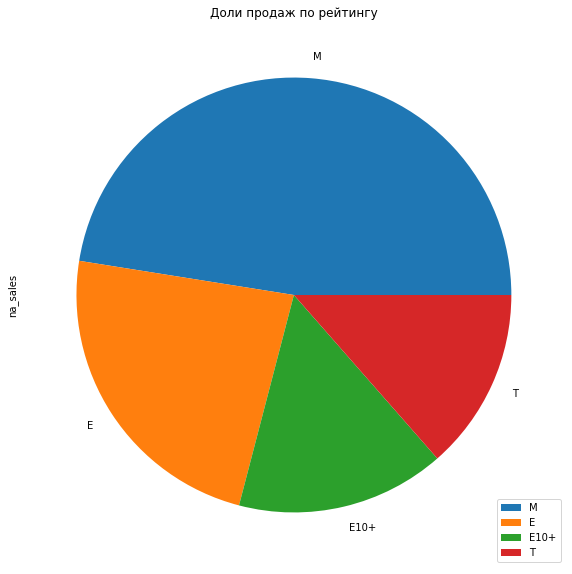

Евросоюз


rating
M       193.96
E       113.03
E10+     55.37
T        52.96
Name: eu_sales, dtype: float64

Доли


rating
M       0.467013
E       0.272152
E10+    0.133319
T       0.127516
Name: eu_sales, dtype: float64

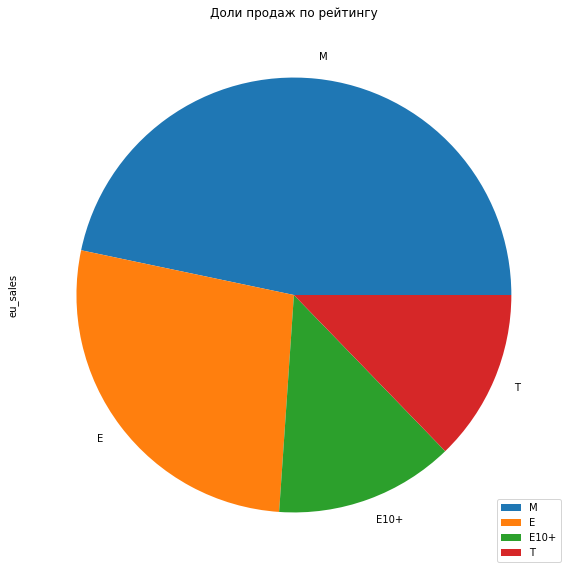

Япония


rating
E       28.33
T       26.02
M       21.20
E10+     8.19
Name: jp_sales, dtype: float64

Доли


rating
E       0.338309
T       0.310724
M       0.253165
E10+    0.097803
Name: jp_sales, dtype: float64

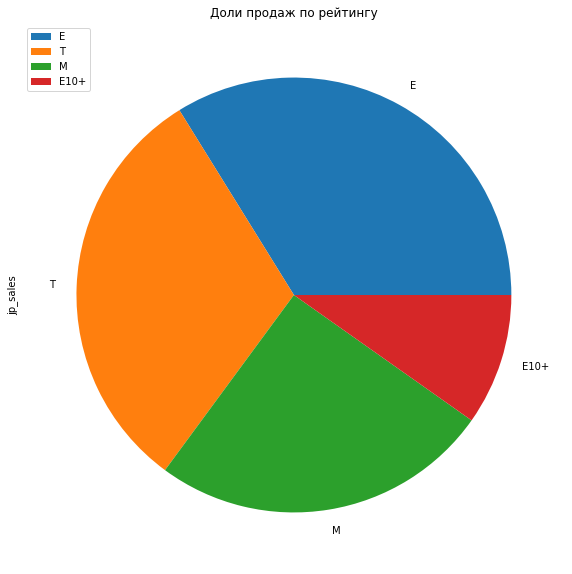

<AxesSubplot:title={'center':'Доли различных игр по возрастному рейтингу в выборке'}, ylabel='jp_sales'>

<AxesSubplot:title={'center':'Доли копий игр по возрастному рейтингу в выборке'}, ylabel='all_sales'>

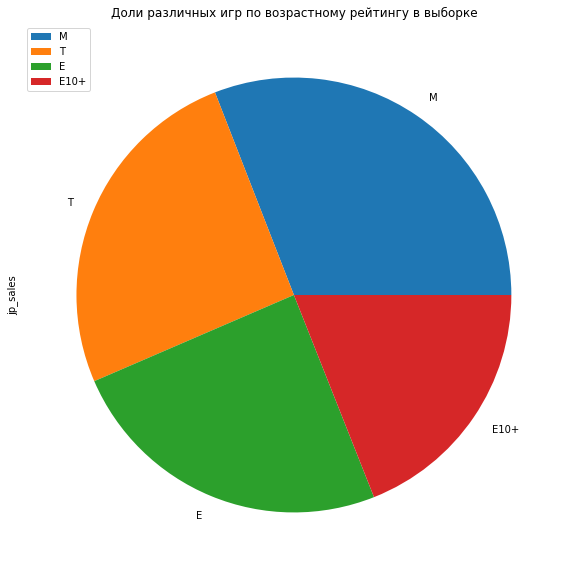

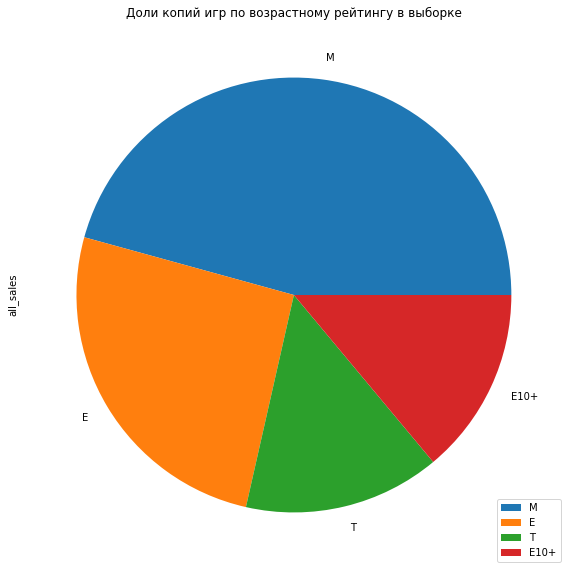

In [53]:
print('Северная Америка')
data_five.groupby(by='rating').sum().sort_values(by='na_sales', ascending=False).plot.pie(y='na_sales', figsize=(10,10), title='Доли продаж по рейтингу')
display(data_five['na_sales'].groupby(by=data_five['rating']).sum().sort_values(ascending=False))
print('Доли')
display(data_five['na_sales'].groupby(by=data_five['rating']).sum().sort_values(ascending=False) / data_five.loc[~(data_five['rating'].isna()), 'na_sales'].sum())
plt.show()
print('Евросоюз')
data_five.groupby(by='rating').sum().sort_values(by='eu_sales', ascending=False).plot.pie(y='eu_sales', figsize=(10,10), title='Доли продаж по рейтингу')
display(data_five['eu_sales'].groupby(by=data_five['rating']).sum().sort_values(ascending=False))
print('Доли')
display(data_five['eu_sales'].groupby(by=data_five['rating']).sum().sort_values(ascending=False) / data_five.loc[~(data_five['rating'].isna()), 'eu_sales'].sum())
plt.show()
print('Япония')
data_five.groupby(by='rating').sum().sort_values(by='jp_sales', ascending=False).plot.pie(y='jp_sales', figsize=(10,10), title='Доли продаж по рейтингу')
display(data_five['jp_sales'].groupby(by=data_five['rating']).sum().sort_values(ascending=False))
print('Доли')
display(data_five['jp_sales'].groupby(by=data_five['rating']).sum().sort_values(ascending=False) / data_five.loc[~(data_five['rating'].isna()), 'jp_sales'].sum())
plt.show()
display(data_five.groupby(by='rating').count().sort_values(by='jp_sales', ascending=False).plot.pie(y='jp_sales', figsize=(10,10), title='Доли различных игр по возрастному рейтингу в выборке'))
data_five.groupby(by='rating').sum().sort_values(by='all_sales', ascending=False).plot.pie(y='all_sales', figsize=(10,10), title='Доли копий игр по возрастному рейтингу в выборке')

Рейтинги ESRB представлены 4-мя рейтингами:
1. «E» («Everyone») — «Для всех»;
2. «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»;
3. «T» («Teen») — «Подросткам»;
4. «M» («Mature») — «Для взрослых».

Соответственно по различным регионам мы получаем:
1. Северная Америка:
 - M       47,5%;
 - E       23,5%;
 - E10+    15,5%;
 - T       13,6%.

2. Евросоюз:
 - M       46,7%;
 - E       27,2%;
 - E10+    13,3%;
 - T       12,8%.

3. Япония:
 - E       33,8%;
 - T       31,1%;
 - M       25,3%;
 - E10+    9,8%.
 
Какие особенности мы можем выделить:
1. Евросоюз и Северная Америка имеют одинкаовые распределения между рейтингами, в обоих регионах лучше всего продаются игры с рейтингом M (практически половина рынка в обоих случаях, а хуже всего с рейтингом T (13%).
2. В Японии же наблюдается отличная от двух других регионов картина: больше всего покупают игры с рейтингом E (треть продаж), а рейтинг M находится на 3-ем из 4 мест (25%).

Можно заключить из полученных диаграмм и таблиц, что рейтинг ESRB действительно влияет на продажи в регионах, особенно это заметно в Японии.

**Но** ранее мы предполагали, что пропуски могут быть связаны с тем, что игра не получала рейтинга для региона NA, т.к. ESRB оперирует именно в этом регионе. заменим пропуски на `undef` и построим эти диаграммы заново.

Северная Америка


rating
M        231.57
E        114.37
undef    103.31
E10+      75.70
T         66.02
Name: na_sales, dtype: float64

Доли


rating
M        0.391847
E        0.193529
undef    0.174814
E10+     0.128094
T        0.111715
Name: na_sales, dtype: float64

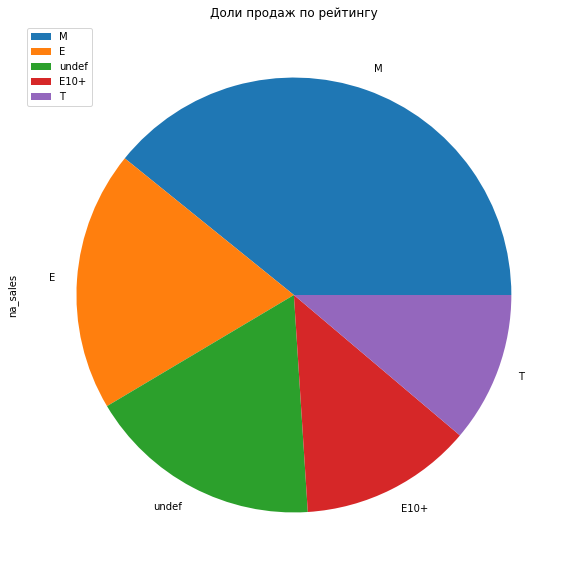

Евросоюз


rating
M        193.96
E        113.03
undef     91.50
E10+      55.37
T         52.96
Name: eu_sales, dtype: float64

Доли


rating
M        0.382700
E        0.223018
undef    0.180537
E10+     0.109250
T        0.104495
Name: eu_sales, dtype: float64

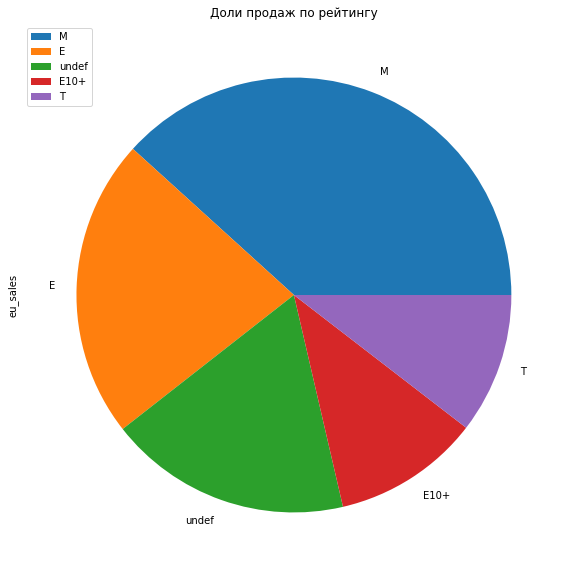

Япония


rating
undef    108.84
E         28.33
T         26.02
M         21.20
E10+       8.19
Name: jp_sales, dtype: float64

Доли


rating
undef    0.565168
E        0.147108
T        0.135113
M        0.110084
E10+     0.042528
Name: jp_sales, dtype: float64

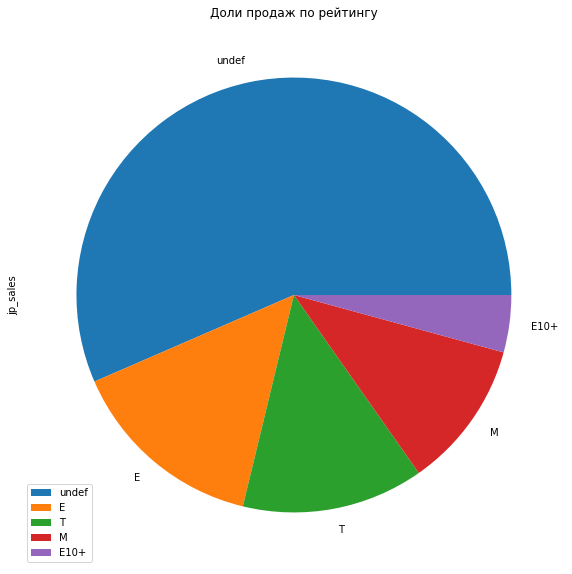

<AxesSubplot:title={'center':'Доли различных игр по возрастному рейтингу в выборке'}, ylabel='jp_sales'>

<AxesSubplot:title={'center':'Доли копий игр по возрастному рейтингу в выборке'}, ylabel='all_sales'>

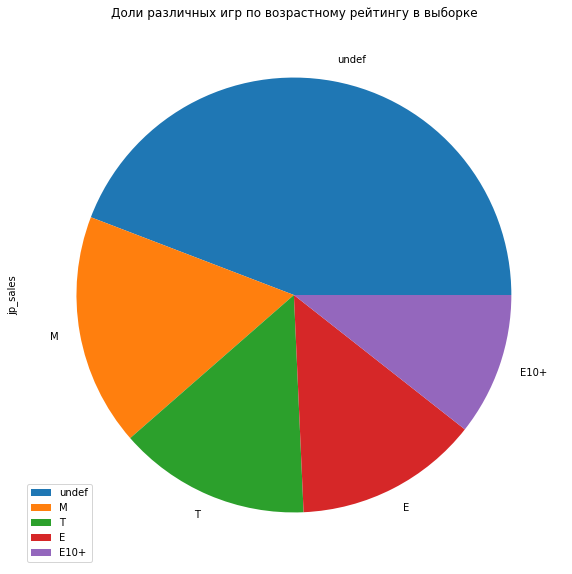

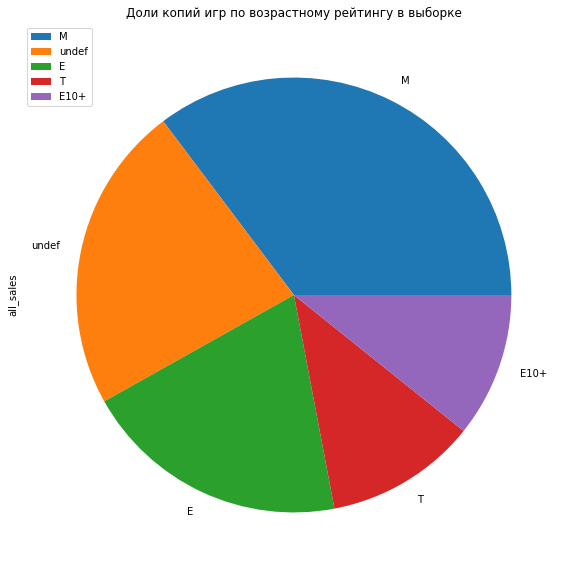

In [54]:
data_undef = data_five.copy()
data_undef['rating'].fillna(value='undef', inplace=True)
print('Северная Америка')
data_undef.groupby(by='rating').sum().sort_values(by='na_sales', ascending=False).plot.pie(y='na_sales', figsize=(10,10), title='Доли продаж по рейтингу')
display(data_undef['na_sales'].groupby(by=data_undef['rating']).sum().sort_values(ascending=False))
print('Доли')
display(data_undef['na_sales'].groupby(by=data_undef['rating']).sum().sort_values(ascending=False) / data_undef.loc[~(data_undef['rating'].isna()), 'na_sales'].sum())
plt.show()
print('Евросоюз')
data_undef.groupby(by='rating').sum().sort_values(by='eu_sales', ascending=False).plot.pie(y='eu_sales', figsize=(10,10), title='Доли продаж по рейтингу')
display(data_undef['eu_sales'].groupby(by=data_undef['rating']).sum().sort_values(ascending=False))
print('Доли')
display(data_undef['eu_sales'].groupby(by=data_undef['rating']).sum().sort_values(ascending=False) / data_undef.loc[~(data_undef['rating'].isna()), 'eu_sales'].sum())
plt.show()
print('Япония')
data_undef.groupby(by='rating').sum().sort_values(by='jp_sales', ascending=False).plot.pie(y='jp_sales', figsize=(10,10), title='Доли продаж по рейтингу')
display(data_undef['jp_sales'].groupby(by=data_undef['rating']).sum().sort_values(ascending=False))
print('Доли')
display(data_undef['jp_sales'].groupby(by=data_undef['rating']).sum().sort_values(ascending=False) / data_undef.loc[~(data_undef['rating'].isna()), 'jp_sales'].sum())
plt.show()
display(data_undef.groupby(by='rating').count().sort_values(by='jp_sales', ascending=False).plot.pie(y='jp_sales', figsize=(10,10), title='Доли различных игр по возрастному рейтингу в выборке'))
data_undef.groupby(by='rating').sum().sort_values(by='all_sales', ascending=False).plot.pie(y='all_sales', figsize=(10,10), title='Доли копий игр по возрастному рейтингу в выборке')

Как мы можем заметить по этим диаграммам, продажи игр возрастной рейтинг которых неопределён составляют **более половины** от всех проданных на эти платформы копий, а соответственно это может оказать большое влияние на все распределения взрастных рейтингов и создать ложную картину.

Скорее всего оименно такая ситуация и возникает, ведь в NA и EU регионах игры с жанром `undef` занимают 3-ю строчку по количеству копий и соответственно 17% и 18% от всех проданных копий, а в JP регионе составляют целых 56% от всех проданных копий, а потому имеет гораздо более серьёзное влияние на распределение рейтингов.

Соответственно полноценно уверждать по этой выборке о каких-либо предпочтениях в рейтингах будет неверно и следует провести дополнительное исследование, например с использованием другой рейтинговой системы схожего характера (PEGI или CERO, например) или некоторым образом создать совмещённый столбец из этих рейтингов. Полученные на предыдущем шаге результаты всё же приведём, но будем указывать, что они могут быть неверными. Будем обозначать это через *.

### Возможный портрет пользователя для каждого из регионов

Для Северной Америки можем составить следующий портрет типичного пользователя:
 - Платформа: X360;
 - Жанр: Action;
 - Рейтинг ESRB: M*.

Для Евросоюза портрет типичного пользователя выглядит следующим образом:
 - Платформа: PS4;
 - Жанр: Action;
 - Рейтинг ESRB: M*.
 
И для Японии типичного пользователя можно описать как:
 - Платформа: 3DS;
 - Жанр: Role-Playing;
 - Рейтинг ESRB: E*.
 
 
 
## Статистический анализ

Проверим некоторые гипотезы.

### Гипотеза №1

Составим нулевую гипотезу №1 следующим образом: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". Тогда альтернативная для неё гипотеза будет звучать как: "Средние пользовательские рейтинги платформ Xbox One и PC разные".
Дисперсии у данных выборок могут быть различны, так как их размер неизвестен. Составим t-тест (зададим `alpha=0.05`):

In [55]:
from scipy import stats as st

sample_1 = data_five.loc[(data_five['platform'] == 'PC') & ~(data_five['user_score'].isna()), 'user_score']
sample_2 = data_five.loc[(data_five['platform'] == 'XOne') & ~(data_five['user_score'].isna()), 'user_score']

alpha = .05

results = st.ttest_ind(sample_1, sample_2, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


По полученному t-тесту мы можем сделать вывод, что вероятность случайно получить такое или большее различие в оценках равно почти 55%. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними оценками на платформах PC и Xbox One.

### Гипотеза №2
Составим нулевую гипотезу №2 следующим образом: "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые". Тогда альтернативная для неё гипотеза будет звучать как: "Средние пользовательские рейтинги жанров Action и Sports разные". Дисперсии у данных выборок могут быть различны, так как их размер неизвестен. Составим t-тест (зададим `alpha=0.05`):

In [56]:
sample_1 = data_five.loc[(data_five['genre'] == 'Action') & ~(data_five['user_score'].isna()), 'user_score']
sample_2 = data_five.loc[(data_five['genre'] == 'Sports') & ~(data_five['user_score'].isna()), 'user_score']

alpha = .05

results = st.ttest_ind(sample_1, sample_2, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


По полученному t-тесту мы можем сделать вывод, что вероятность случайно получить такое или большее различие в оценках равно 4 * 10<sup>-20</sup>%. Это явно слишком малая вероятность, поэтому нулевая гипотеза опровергается и мы можем сделать вывод, что пользовательские оценки для жанров Action и Sports различны.

## Общий вывод

Было проведено исследование со следующими целями:
1. Изучить как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам;
2. Изучить сколько игр выпускалось в разные годы;
3. Выделить актуальный временной период;
4. Изучить какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ;
5. Изучить как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков;
6. Изучить общее распределение игр по жанрам. Посмотреть выделяются ли жанры с высокими и низкими продажами;
7. Проверить гипотезу "средние пользовательские рейтинги платформ Xbox One и PC одинаковые";
8. Проверить гипотезу "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные".
9. Составить портрет пользователя для каждого из 3 крупных регионов (Северная Америка, Евросоюз, Япония).

Были получены следующие результаты:

### Изучить как менялись продажи по платформам по годам, выделить актуальный временной период
Для всех игр, представленных в таблице была составлена следующая гистограмма, показывающая распределение игр по годам:
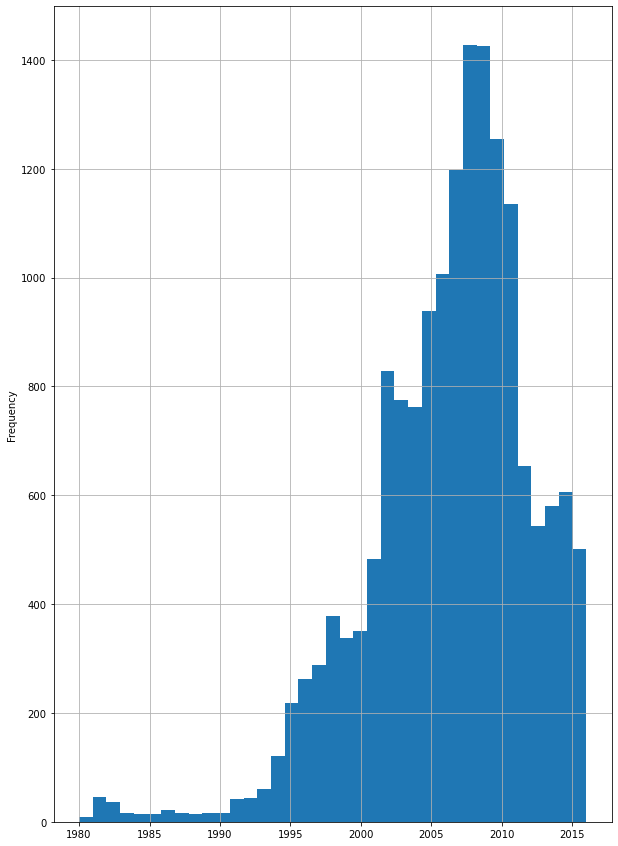

Также были отобраны 10 самых популярных платформ следующего вида, на которых было отображено количество проданных копий и число различных релизов в распределении по годам (например для платформы PS2):
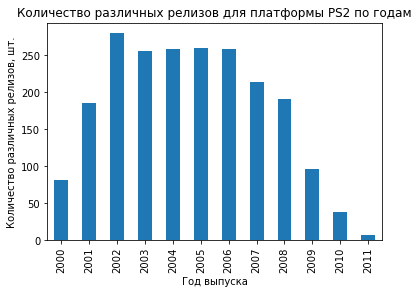
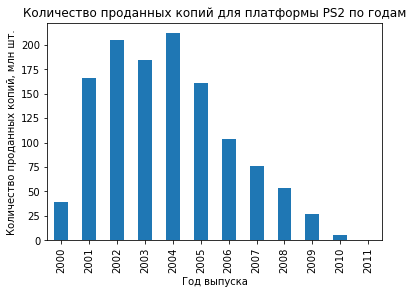

Также на этом этапе было установлено, что средний срок продолжительности жизни платформы (для 10 самых популярных из них) составил в среднем 10 лет, а самое большое количество игр выходило на них на 4-й год (максимальные суммарные продажи также в среднем были у игр, которые выходили на 4 год жизни консоли).

**Таким образом было решено в дальнейших исследованиях использовать временной промежуток в 5 лет (2012-2016), для того, чтобы охватить как консоли, которые ещё не достигли середины своего жизненного цикла и которые ещё могут показать рост продаж, так и те, которые на данный момент уже могут заканчивать свой жизненный цикл, но всё ещё могут получить новые игры.**

### Изучить какие платформы лидируют по продажам, растут или падают
Для всех платформ, представленных в списке, который содержит все релизы игр с 2012 по 2016 годы были посстроенны гистограммы, показывающие количство различных игр, выпущенных на платформу и количество проданных копий (использовались глобальные продажи) в распределении по годам.
Среди платформ, которые растут по продажам мы можем выделить:
 - PS4;
 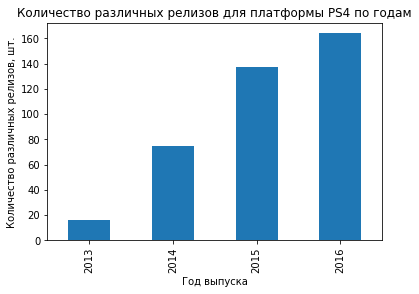
 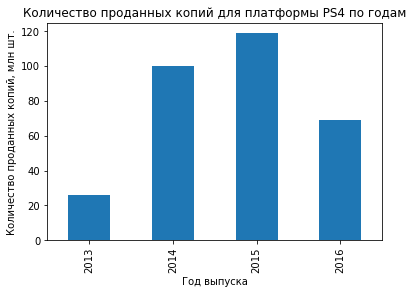
 - XOne.
 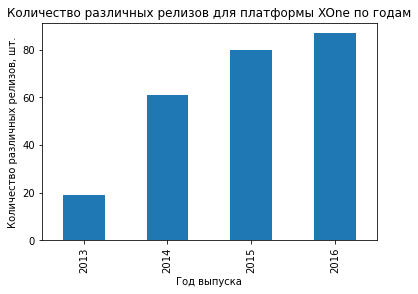
 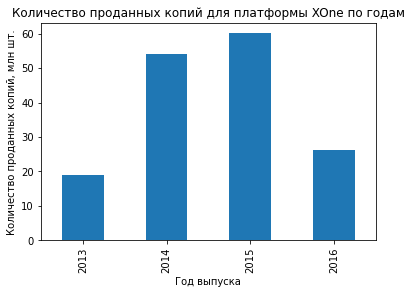
 
А среди платфом, продажи которых падают:
 - Wii;
 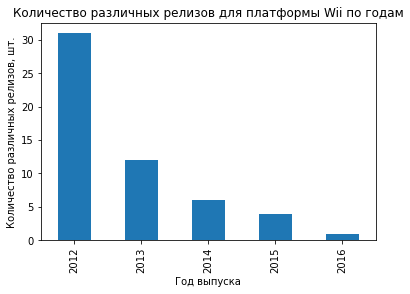
 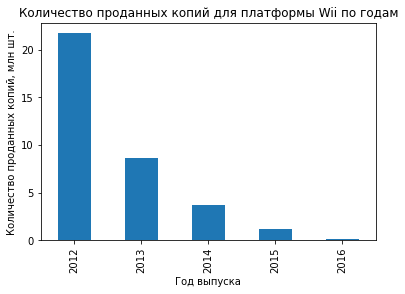
 - X360;
 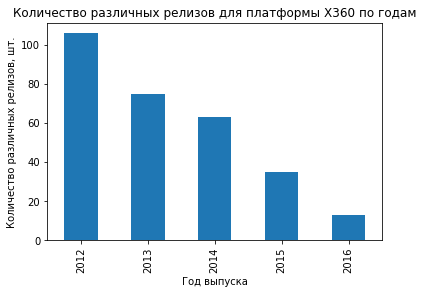
 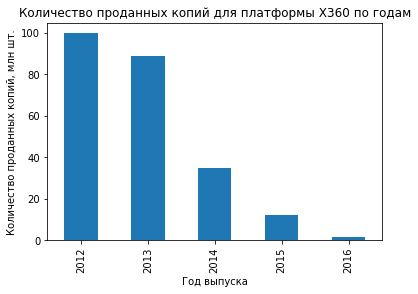
 - PS3;
 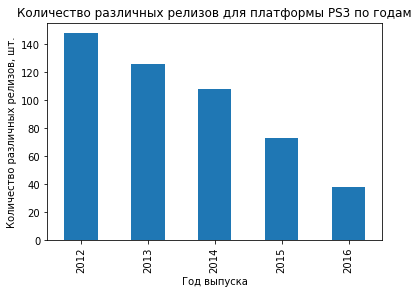
 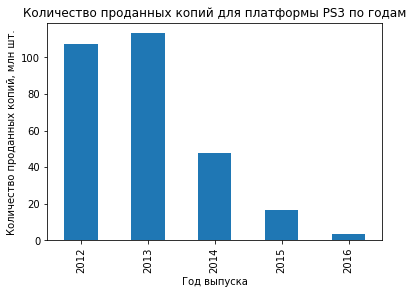
 - WiiU;
 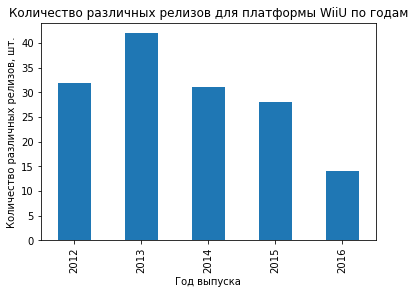
 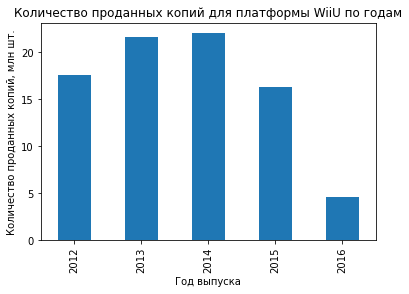
 - PSV.
 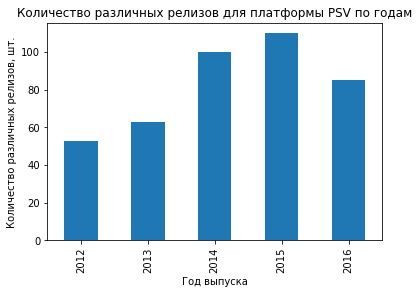
 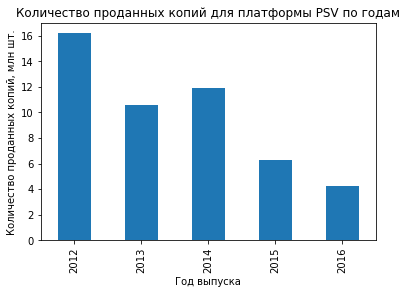
 
На остальные же платформы, представленные в списке выпуск игр уже был прекращён, поэтому можно считать, что они уже прекратили свой жизненный цикл.

### Изучить как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков
Для проверки наличия связи глобальных продаж с отзывами пользователей или критиков была выбрана платформа PS3, был посчитан коэффициент корреляции Пирсона, а также были построены матрицы рассеивания следующего вида:
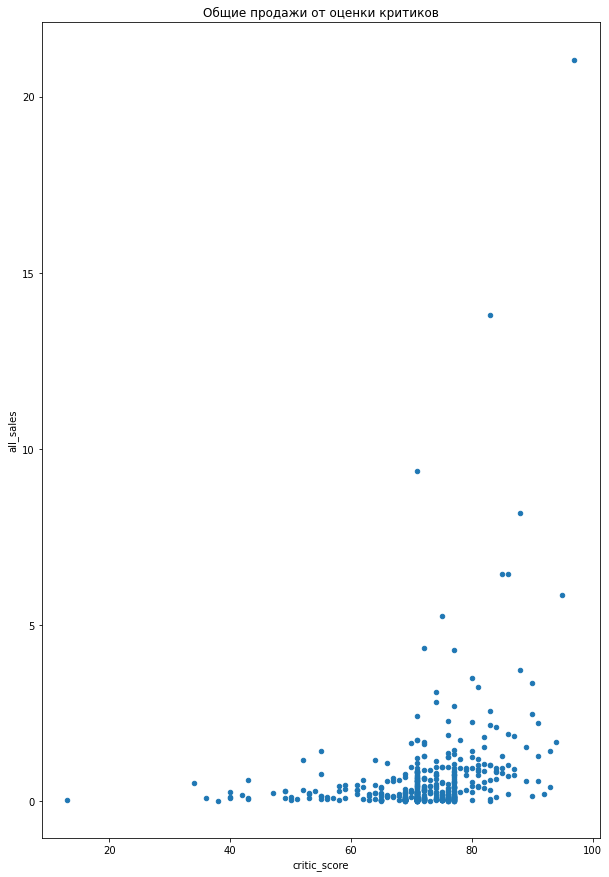
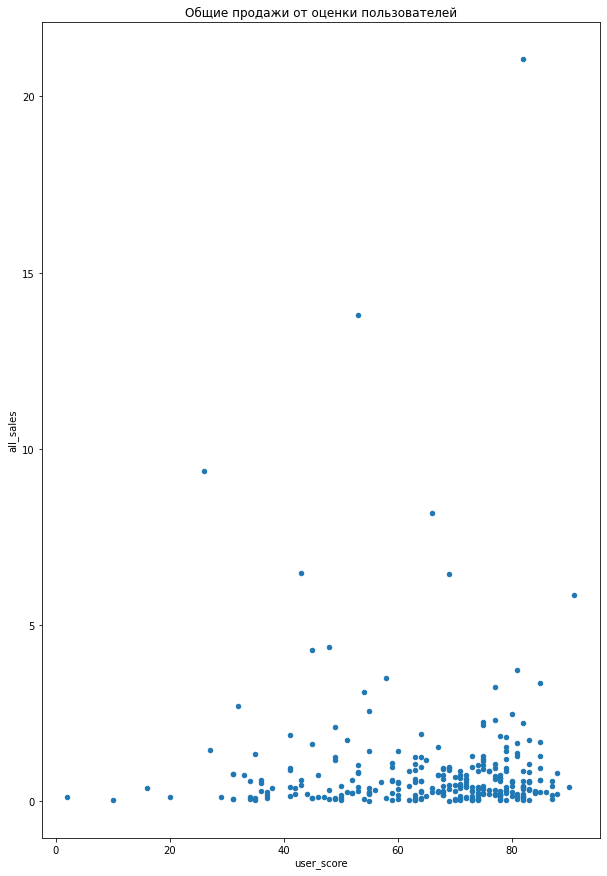

Соответствующие коэффициенты корреляции Пирсона составили 0,29 и -0,005, что говорило о наличии крайне слабой линейной связи, из чего можно сделать вывод, что **связи между оценками пользователей (критиков) и суммарными продажами игры не существует или она крайне мала**.

Для проверки данного утверждения были построены аналогичные диагараммы и получены аналогичные коэффициенты корреляции для всех платформ, в результате чего были получены аналогичные выводы. Средние значения составили 0,33 для оценок критиков и -0,004 для оценок пользователей, а матрица рассеивания выглядят следующим образом(например, PS4):
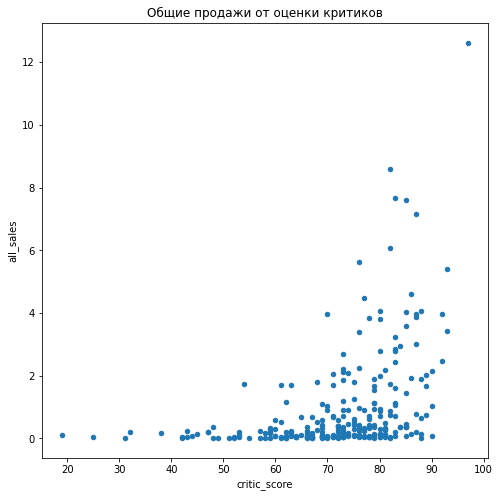
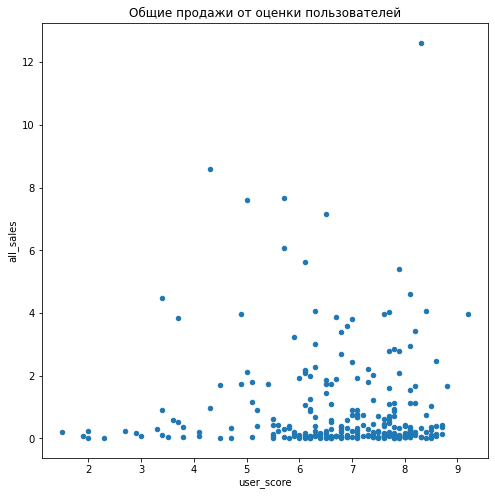

Однако для некоторых платформ в выборке присутствувало всего по 1 игре с оценкой, что может говорить о том, что результаты могут быть достоверными не для всех платформ. Такая ситуация возникает в разной степени у 3 платформ из 10, поэтому для получения среднего для всех платформ использовались медианные оценки.

Из этого был сделан вывод, что независимость продаж от оценки критиков скорее всего верна для всей выборки, но возможно следует провести дополнительное исследование с большим количеством оценок пользователей и критиков.

### Изучить общее распределение игр по жанрам
Было проведено исследование игр в распределении по жанрам, в результате чего были получены следующие круговые диаграммы, которые показывают распределение различных игр по жанрам, а также распределение проданных копий (для всех регионов) по жанрам:
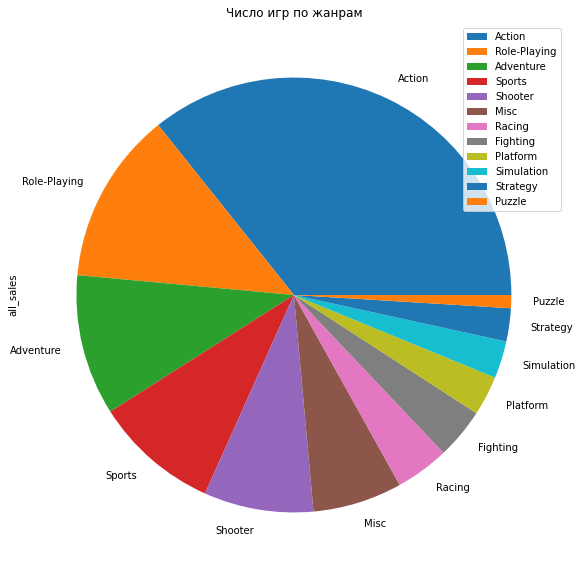
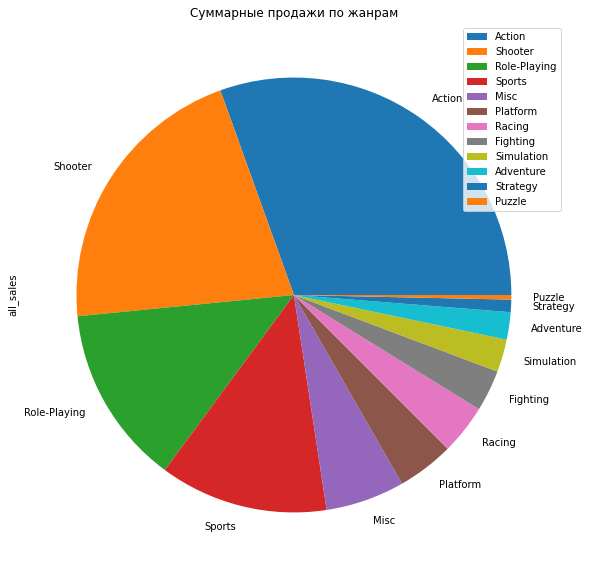

По данным круговым диаграмма были сделаны следующие выводы и замечания:
1. Наибольшую долю рынка (более 50%) по количеству различных релизов занимают следующие жанры:
 - Action;
 - Role-Playing;
 - Adventure.
2. Наименьшую долю рынка занимают жанры:
 - Puzzle;
 - Strategy;
 - Simulation.

Относительно количества проданных копий же получаем иную статистику:
1. Наибольшую долю рынка (более 50%) составляют продажи игр следующих жанров:
 - Action;
 - Shooter.
 
Вмесие с жанром Role-Playing эти жанры суммарно составляют около 65% от всех проданных копий.

2. Наименьшую долю рынка составляют продажи игр жанров:
 - Puzzle;
 - Strategy;
 - Adventure.
 
 По двум этим круговым диаграммам можем сделать следующие замечания:
 1. Жанр Shooter, в котором выпускают только около 1/16 (~6,25%) от всех различных релизов составляют практически 1/4 от всех продаж, что говорит о том, что хотя игр в этом жанре выходит меньше, но продаются они сильно лучше, чем игры в других жанрах.
 2. Жанр Adventure же показывает обратную тенденцию: хотя количество игр, выходящих в этом жанре составляет около 1/8 (~12,5%) от всех различных релизов составляет лишь около 2% от всех проданных копий, то есть хотя игр в этом жанре выходит больше, но продаются они в среднем хуже, чем другие.
 
 Также были изучены медианные продажи и были получены следующие результаты:
 Лучшие медианные продажи имеют жанры:
 - Shooter (0,44 млн);
 - Sports (0,24 млн);
 - Platform (0,21 млн).

 Худшие медианные продажи:
 - Adventure (0,03 млн);
 - Strategy (0,08 млн);
 - Action, Simulation, Misc (0,12 млн).

 Медианные продажи говорят о том, что игры в определённом жанре будут в целом продаваться "лучше" или "хуже" по сравнению с остальными.

 Лучшие средние продажи:
 - Shooter (1,30 млн);
 - Platform (0,72 млн);
 - Sports (0,68 млн).
 
 Худшие средние продажи:
 - Adventure (0,10 млн);
 - Puzzle (0,17 млн);
 - Strategy (0,19 млн).

 Средние продажи говорят о наличии сильных выбросов в меньшую или большую сторону для этого жанра.

 Таким образом мы можем заключить, что для жанров Shooter, Sports, Platform верно как то, что игры в этих жанрах в среднем продаются лучше, чем во всех остальных жанрах, так и то, что в них присутствуют игры, которые могут оказаться "хитами". Полностью обратная ситуация присуща жанрам Strategy, Adventure, игры в которых в среднем продаются хуже, чем в остальных, но и "хиты" скорее всего будут "хитами" для жанра, но не для общей картины.
 
### Статистический анализ

1. Была проверена гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". Для этого была составлена нулевая гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". Также была составлена альтернаятивная гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC разные". Был проведён t-тест на соответствующих выборках игр для платформ Xbox One и PC с критическим уровнем статистической значимости 0,05. При помощи t-теста не получилось опровергнуть нулевую гипотезу, по всей видимости средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Была проверена гипотеза: "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные". Для этого была составлена нулевая гипотеза: "Средние пользовательские рейтинги жанров Action и Sports одинаковые". Также была составлена альтернаятивная гипотеза: "Средние пользовательские рейтинги жанров Action и Sports разные". Был проведён t-тест на соответствующих выборках игр для платформ Xbox One и PC с критическим уровнем статистической значимости 0,05. При помощи t-теста не получилось опровергнуть нулевую гипотезу, по всей видимости средние пользовательские рейтинги платформ Xbox One и PC одинаковые. В результате проведения t-теста нулевую гипотезу пришлось отвергнуть, соответственно средние пользовательские рейтинги жанров Action и Sports разные.

### Портрет пользователя по регионам

Были исследованы следующие показатели:

#### 1. Был составлен рейтинг платформ (топ-5) по регионам:
По регионам мы можем сказать следующее (топ-5 платформ):

1. В Северной Америке популярнее всего следующие платформы:
 - X360    23,6%;
 - PS4     18,4%;
 - PS3     17,5%;
 - XOne    15,8%;
 - 3DS      9,4%.

2. В Евросоюзе популярнее всего следующие платформы:
 - PS4     27,8%;
 - PS3     21,1%;
 - X360    14,7%;
 - XOne    10,2%;
 - 3DS      8,4%.

3. В Японии популярнее всего следующие платформы:
 - 3DS     45,6%;
 - PS3     18,3%;
 - PSV     10,9%;
 - PS4      8,3%;
 - WiiU     6,8%.
 
Выделим особенности для регионов:
1. В Северной Америке (NA) популярнее по сравнению с другими регионами распространены X360, XOne, которые являются консолями Майкрософт - американского производителя.
2. В Евросоюзе (EU) больше распространены платформы PS3 и PS4 производства Sony, суммарно занимающие практически до половину от всех продаж.
3. В Японии все платформы, представленные в топ-5 списке от локальных производителей Nintendo и Sony, также в отличие от 2 других регионов в списке представлены целых 2 портативных платформы PSV (не представлена больше ни в одном другом топе) и 3DS (которая в отличие от 2 других регионов, в которых занимает 5-е места, занимает 1-е место с охватом в 45,6% рынка).

#### 2. Был составлен рейтиг жанров (топ-5) по регионам:
По регионам мы можем сказать следующее (топ-5 жанров):

1. В Северной Америке популярнее всего следующие жанры:
 - Action          30,1%;
 - Shooter         24,5%;
 - Sports          13,8%;
 - Role-Playing    10,8%;
 - Misc            6,5%.

2. В Евросоюзе популярнее всего следующие жанры:
 - Action          31,4%;
 - Shooter         22,4%;
 - Sports          13,6%;
 - Role-Playing    9,6%;
 - Racing          5,4%.

3. В Японии популярнее всего следующие платформы:
 - Role-Playing    34,0%;
 - Action          27,4%;
 - Misc            6,7%;
 - Simulation      5,4%;
 - Fighting        4,9%.
 
Выделим особенности:
1. Жанр Action примерно одинаково популярен во всех 3-х регионах(NA - 30,1%; EU - 31,4%; JP - 27,4%).
2. Первую четвёрку жанров в Северной Америке и Евросоюзе составляют одни и те же жанры: Action, Shooter, Sports, Role-Playing, при этом проценты распространения практически совпадают.
3. Топ-5 жанров в Японии сильно отличаются от двух других регионов - это единственный регион, в котором в первую пятёрку попадают жанры Simulation и Fighting, а в первой четвёрке присутствуют жанры Misc (Другие жанры) и Simulation. 
4. Также в Японии жанр Role-Playing занимает 34% от всех продаж в отличие от 10,8% и 9,6% в других регионах. Возможно такая популярность этого жанра объясняется популярностью в Японии поджанра данного жанра - JRPG - Japanese Role-Playing Game (Японская ролевая игра).
#### 3. Была исследована связь рейтинга ESRB с продажам жанров по регионам:
Рейтинги ESRB представлены 4-мя рейтингами:
1. «E» («Everyone») — «Для всех»;
2. «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»;
3. «T» («Teen») — «Подросткам»;
4. «M» («Mature») — «Для взрослых».

Соответственно по различным регионам мы получаем:
1. Северная Америка:
 - M       47,5%;
 - E       23,5%;
 - E10+    15,5%;
 - T       13,6%.

2. Евросоюз:
 - M       46,7%;
 - E       27,2%;
 - E10+    13,3%;
 - T       12,8%.

3. Япония:
 - E       33,8%;
 - T       31,1%;
 - M       25,3%;
 - E10+    9,8%.
 
Какие особенности мы можем выделить:
1. Евросоюз и Северная Америка имеют одинкаовые распределения между рейтингами, в обоих регионах лучше всего продаются игры с рейтингом M (практически половина рынка в обоих случаях, а хуже всего с рейтингом T (13%).
2. В Японии же наблюдается отличная от двух других регионов картина: больше всего покупают игры с рейтингом E (треть продаж), а рейтинг M находится на 3-ем из 4 мест (25%).

Но далее были рассмотрены также и игры, возрастной рейтинг которых неопределён, по сле чего выяснилось, что они имеют достаточно большое влияние на общие продажи игр и на продажи в регионах.

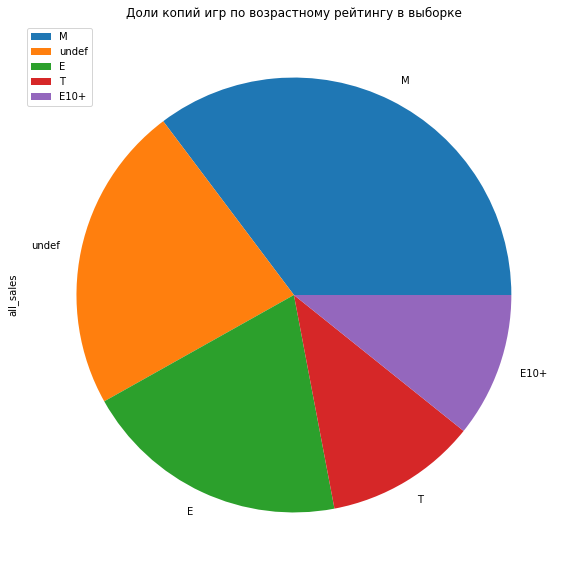
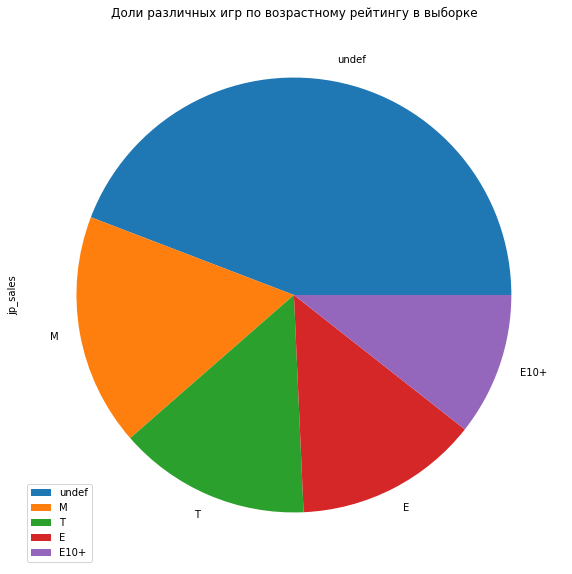
По диаграммам, продажи игр возрастной рейтинг которых неопределён составляют **более половины** от всех проданных на эти платформы копий, а соответственно это может оказать большое влияние на все распределения взрастных рейтингов и создать ложную картину.

Скорее всего именно такая ситуация и возникает, ведь в NA и EU регионах игры с жанром `undef` занимают 3-ю строчку по количеству копий и соответственно 17% и 18% от всех проданных копий, а в JP регионе составляют целых 56% от всех проданных копий, а потому имеет гораздо более серьёзное влияние на распределение рейтингов.
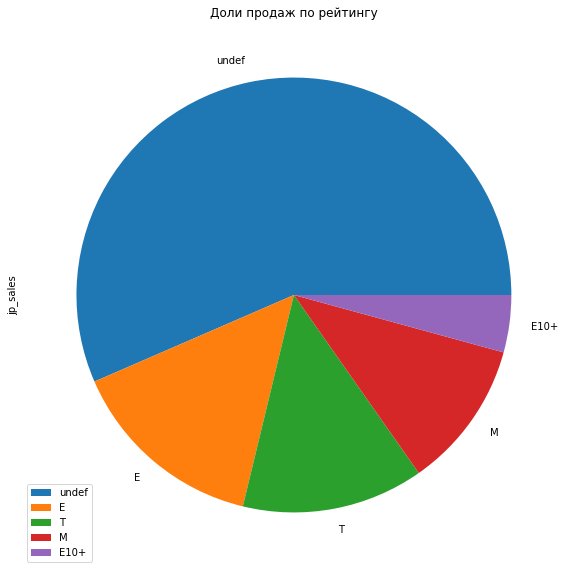

Соответственно полноценно уверждать по этой выборке о каких-либо предпочтениях в рейтингах будет неверно и следует провести дополнительное исследование, например с использованием другой рейтинговой системы схожего характера (PEGI или CERO, например) или некоторым образом создать совмещённый столбец из этих рейтингов. Полученные на предыдущем шаге результаты всё же приведём, но будем указывать, что они могут быть неверными. Будем обозначать это через *.
#### 4. Наиболее вероятный портрет пользователя по регионам:
Был составлен наиболее вероятный портрет пользователя по регионам:

Для Северной Америки можем составить следующий портрет типичного пользователя:
 - Платформа: X360;
 - Жанр: Action;
 - Рейтинг ESRB: M*.

Для Евросоюза портрет типичного пользователя выглядит следующим образом:
 - Платформа: PS4;
 - Жанр: Action;
 - Рейтинг ESRB: M*.
 
И для Японии типичного пользователя можно описать как:
 - Платформа: 3DS;
 - Жанр: Role-Playing;
 - Рейтинг ESRB: E*.
 
Также в процессе составления портрета пользователя были получены диаграммы следующего вида для каждого из исследуемых параметров (приведём в пример диаграммы для региона Северная Америка):
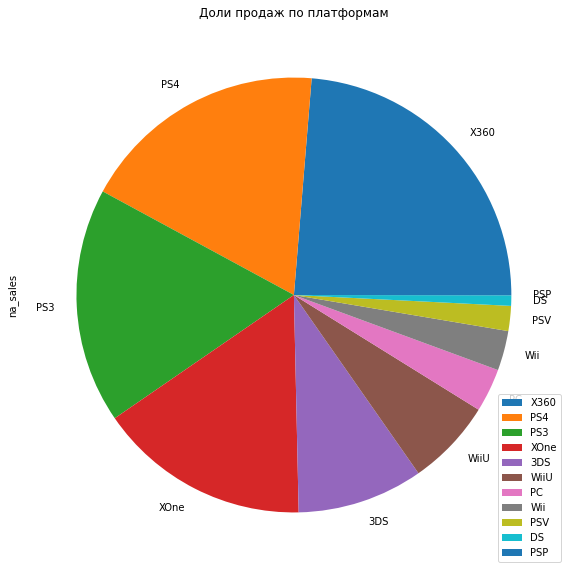
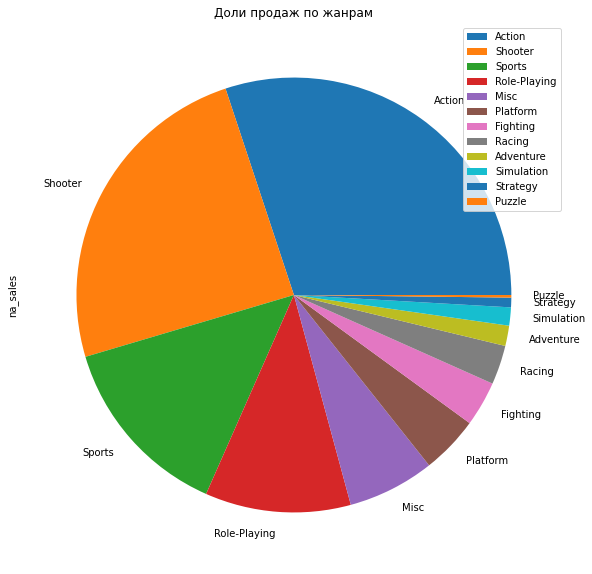
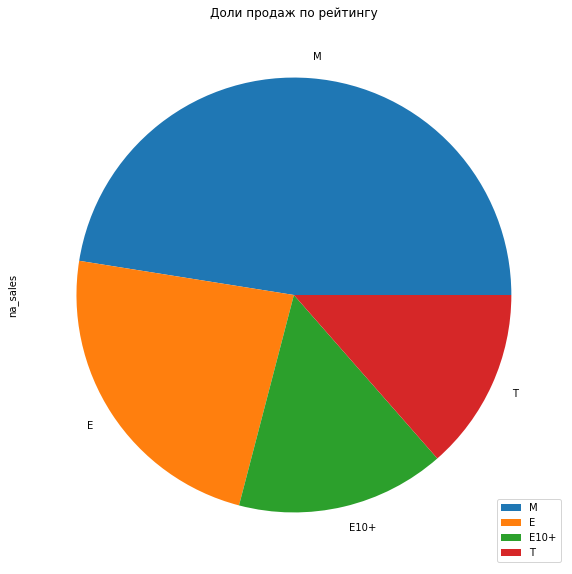
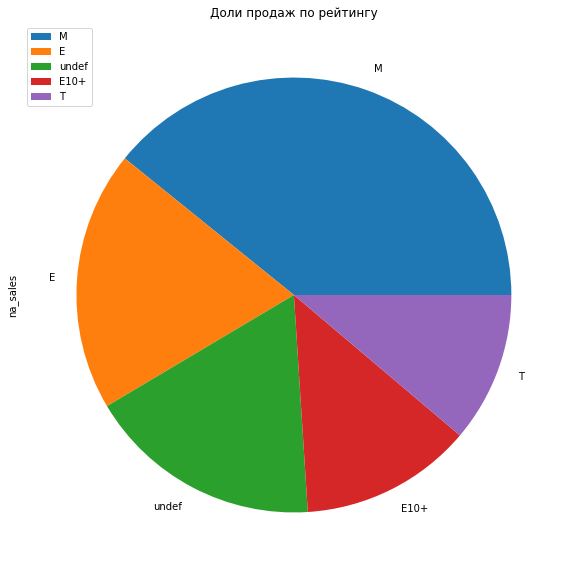

### Рекомендации и заключения
На основе полученных данных были выявлены следующие закономерности:
1. Актуальным периодом следует считать промежуток от 2012 по 2016 год, так как средний жизненный цикл платформы составляет около 10 лет;
2. При составлении рекламных кампаний следует учитывать регион для которого составляется рекламная кампания, так как портреты пользователей в разных регионах отличны друг от друга (Например, предпочтения по жанрам пользователей из NA и EU регионов отличаются от жанровых предпочтений пользователей из JP региона);
3. Не у всех жанров одинаковые средние продажи, разница достаточно существенная, а также различныя способность создавать "хиты". Лучшие результаты в этом плане показывают жанры Shooter, Sports и Platform;
4. Оценки критиков и пользователей с большой вероятностью не влияют на продажи игр в настоящее время, но следует уточнить данные и возможно провести дополнительное исследование;
5. Предпочтения по возрастному рейтингу пользователей на данной выборке провести было невозможно, так как данные слишком сильно были искажены пропусками, соответственно для этих значений потребуется дополнительное исследование;
6. Практически у всех актуальных платформ наблюдается рост (или отсутствует снижение) медианных значений продаж при смене поколения платформы на более новое, за исключением плафтормы Xbox, что возможно говорит о её меньшей прибыльности в данный момент.